In [1]:
from pandas import read_csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold,GridSearchCV,train_test_split , cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

## Dataset = Company 

### Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 

> Sales -- Unit sales (in thousands) at each location

>Competitor Price -- Price charged by competitor at each location

>Income -- Community income level (in thousands of dollars)

>Advertising -- Local advertising budget for company at each location (in thousands of dollars)

>Population -- Population size in region (in thousands)

>Price -- Price company charges for car seats at each site

> Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site

>Age -- Average age of the local population

>Education -- Education level at each location

>Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location

>US -- A factor with levels No and Yes to indicate whether the store is in the US or not

### The company dataset looks like this: 
 
Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.

In [2]:
df =  pd.read_csv("C:\\Users\\Shivani Bhavsar\\OneDrive\\Documents\\ExcelR Assignment files\\DS\\A15 Random forest\\Company_Data.csv")
df

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Education Urban   US  
0           17   Yes  Yes  
1           10   Yes  Yes  
2           12   Yes  Yes  
3           14   Yes  Yes  
4           13   Yes   No  
..         ...   ...  ...  
395         14   Yes  Yes  
396         11    No  Yes  
397         18   Yes  Yes  
398         12   Yes  Yes  
399         16   Yes  Yes  

[400 rows x 11 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
df.describe()

Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education  
count  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000  
std     23.676664   16.200297    2.620528  
min     24.000000   25.000000   10.000000  
25%    100.000000   39.750000   12.000000  
50%    117.000000   54.500000   14.000000  
75%    131.000000   66.000000   16.000000  
max    191.000000   80.000000   18.000000

In [5]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [6]:
df.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [7]:
df.agg(["skew","kurt"])

Sales  CompPrice    Income  Advertising  Population     Price  \
skew  0.185560  -0.042755  0.049444     0.639586   -0.051227 -0.125286   
kurt -0.080877   0.041666 -1.085289    -0.545118   -1.202318  0.451885   

           Age  Education  
skew -0.077182   0.044007  
kurt -1.134392  -1.298332

In [8]:
for i in df.columns :
    print(i , '\n', df[i].value_counts())

Sales 
 7.80    4
8.77    3
9.32    3
4.10    3
6.20    3
       ..
3.67    1
7.62    1
9.54    1
8.41    1
9.71    1
Name: Sales, Length: 336, dtype: int64
CompPrice 
 121    16
122    14
131    14
123    13
115    12
       ..
94      1
161     1
97      1
88      1
85      1
Name: CompPrice, Length: 73, dtype: int64
Income 
 69     11
42     10
32      8
100     8
67      7
       ..
27      1
114     1
43      1
112     1
23      1
Name: Income, Length: 98, dtype: int64
Advertising 
 0     144
10     25
11     22
13     20
5      19
7      16
12     16
3      14
4      12
15     12
16     11
8      11
14     11
9      10
2       9
19      8
1       8
6       7
17      6
18      6
20      4
23      2
22      2
24      1
25      1
26      1
29      1
21      1
Name: Advertising, dtype: int64
Population 
 276    4
148    4
237    4
170    4
220    4
      ..
216    1
492    1
356    1
416    1
368    1
Name: Population, Length: 275, dtype: int64
Price 
 120    12
128    12
107    10
1

In [9]:
for i in df.columns:
    print(i , "\n" , df[i].unique())

Sales 
 [ 9.5  11.22 10.06  7.4   4.15 10.81  6.63 11.85  6.54  4.69  9.01 11.96
  3.98 10.96 11.17  8.71  7.58 12.29 13.91  8.73  6.41 12.13  5.08  5.87
 10.14 14.9   8.33  5.27  2.99  7.81 13.55  8.25  6.2   8.77  2.67 11.07
  8.89  4.95  6.59  3.24  2.07  7.96 10.43  4.12  4.16  4.56 12.44  4.38
  3.91 10.61  1.42  4.42  7.91  6.92  4.9   6.85 11.91  0.91  5.42  5.21
  8.32  7.32  1.82  8.47  7.8   8.85 13.39  7.99  9.46  6.5   5.52 12.61
  8.55 10.64  7.7   4.43  9.14  8.01  7.52 11.62  2.23  8.7  11.7   6.56
  7.95  5.33  4.81  4.53  8.86  8.39  5.58  9.48  7.45 12.49  4.88  4.11
  5.3   5.07  4.62  5.55  0.16  3.47  8.98  9.    6.62  6.67  6.01  9.31
  8.54  8.8   7.57  7.37  6.87 11.67  6.88  8.19  8.87  9.34 11.27  6.52
  4.96  4.47  8.41  9.54  7.62  3.67  6.44  5.17 10.27 12.3   6.03  6.53
  7.44  0.53  9.09  3.9  10.51  7.56 11.48 10.49 10.77  7.64  5.93  6.89
  7.71  7.49 10.21 12.53  9.32  4.67  2.93  3.63  5.68  8.22  0.37  6.71
  7.3   9.03  6.38  0.    7.54  5.61 10.48 

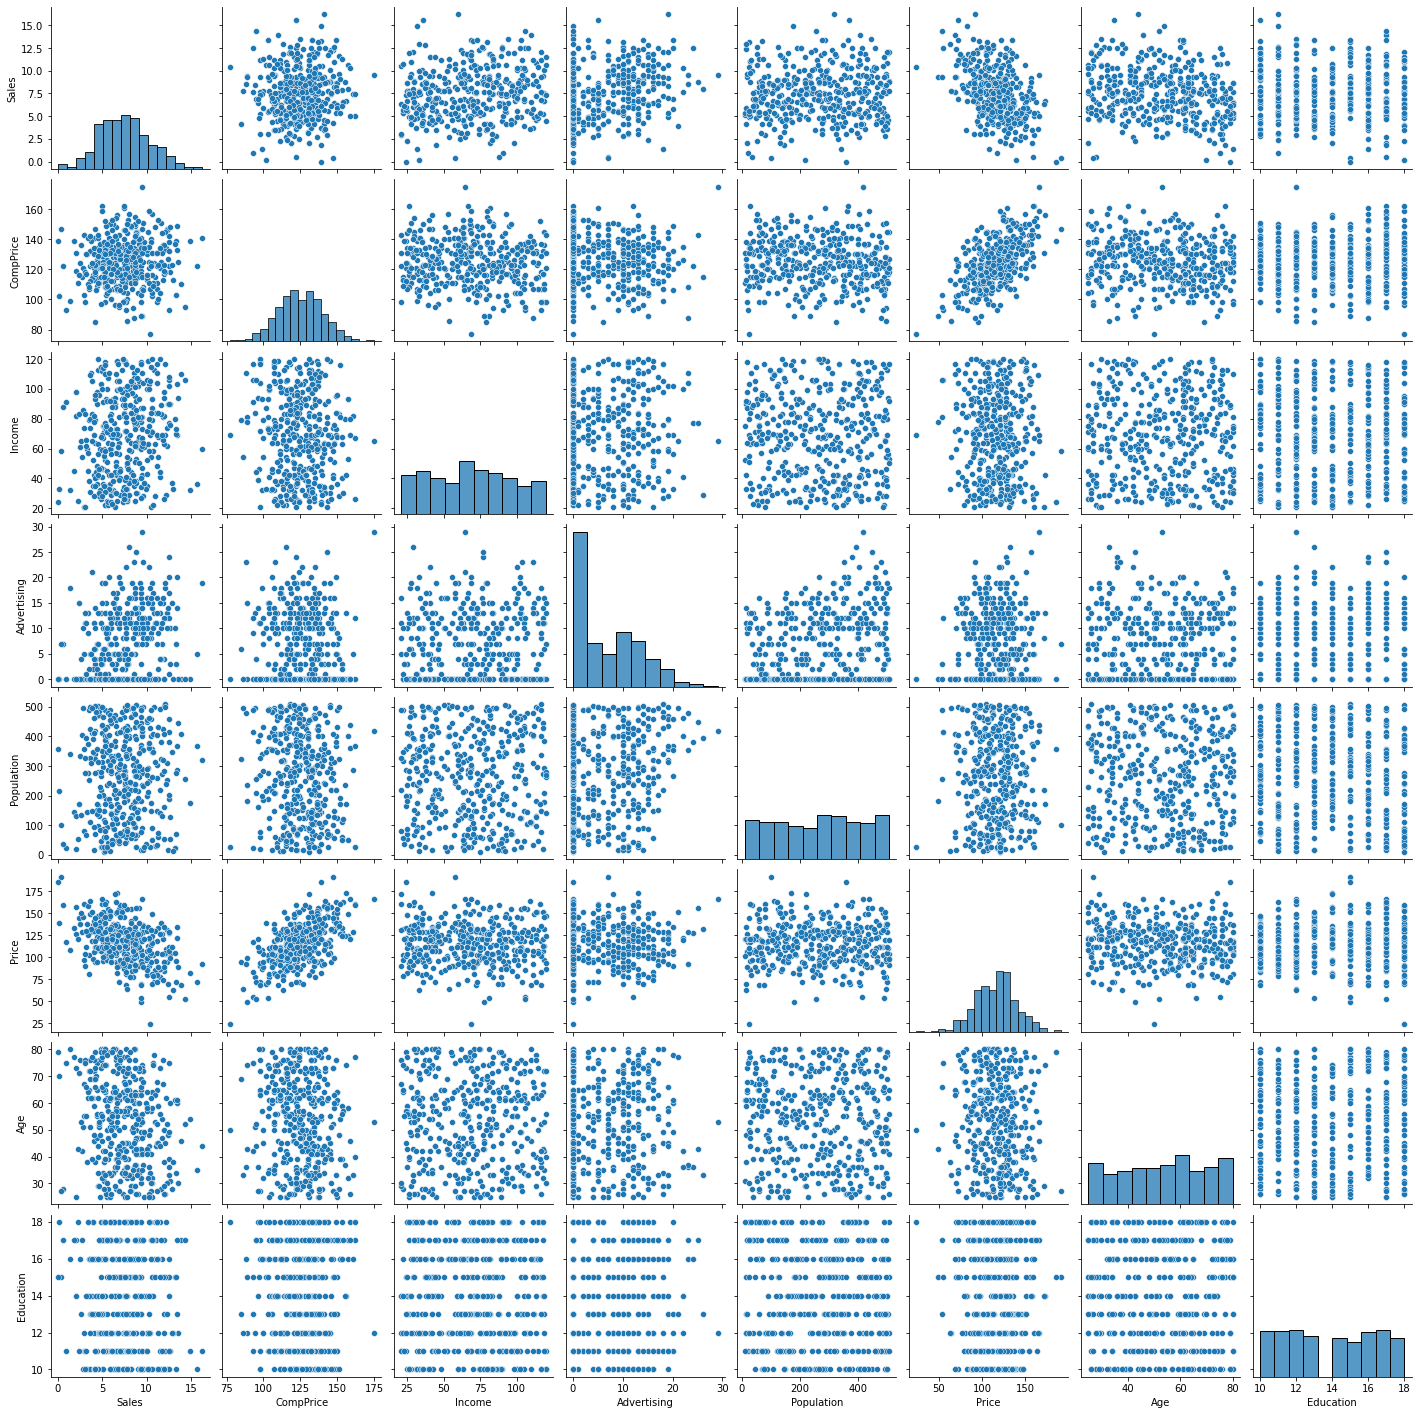

In [10]:
sns.pairplot(df)

In [11]:
s = df["Sales"].value_counts()
s

7.80    4
8.77    3
9.32    3
4.10    3
6.20    3
       ..
3.67    1
7.62    1
9.54    1
8.41    1
9.71    1
Name: Sales, Length: 336, dtype: int64

In [12]:
pd.Series(s).value_counts()

1    282
2     45
3      8
4      1
Name: Sales, dtype: int64

Skew: 0.18556036318721578
Kurtosis: -0.08087736743346197


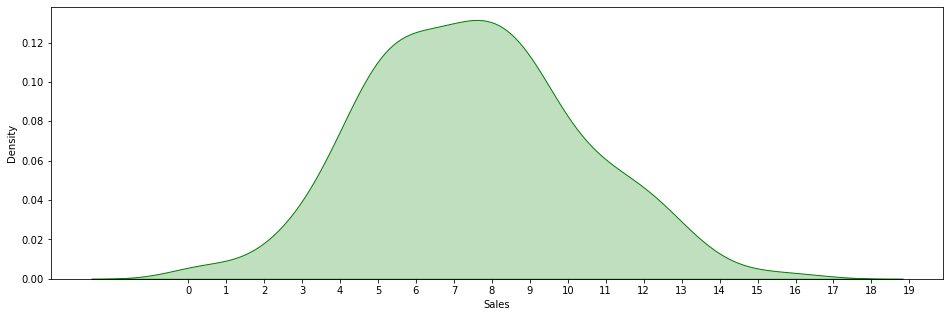

In [13]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(df['Sales'].skew()))
print("Kurtosis: {}".format(df['Sales'].kurtosis()))
ax = sns.kdeplot(df['Sales'],shade=True,color='g')
plt.xticks([i for i in range(0,20,1)])
plt.show()

In [14]:
# find categorical and numeric variables

categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :\n', categorical)
print('\n')
numeric = [var for var in df.columns if df[var].dtype!='O']
print('There are {} Numeric variables\n'.format(len(numeric)))
print('The Numeric variables are :\n', numeric)

There are 3 categorical variables

The categorical variables are :
 ['ShelveLoc', 'Urban', 'US']


There are 8 Numeric variables

The Numeric variables are :
 ['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education']


<Figure size 432x288 with 0 Axes>

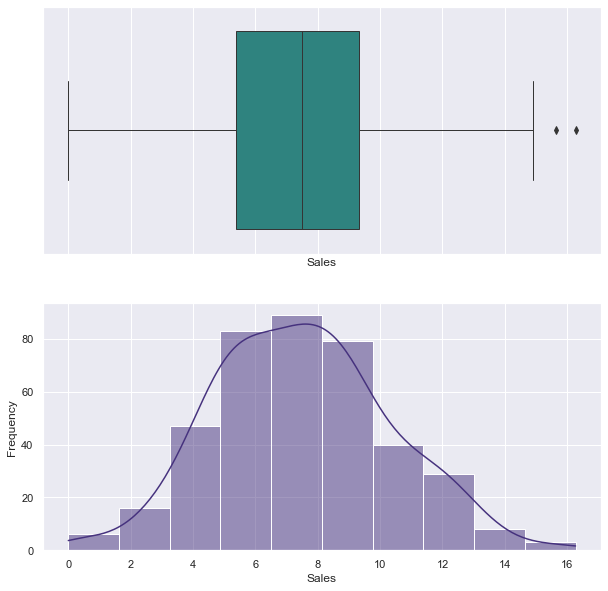

<Figure size 720x720 with 0 Axes>

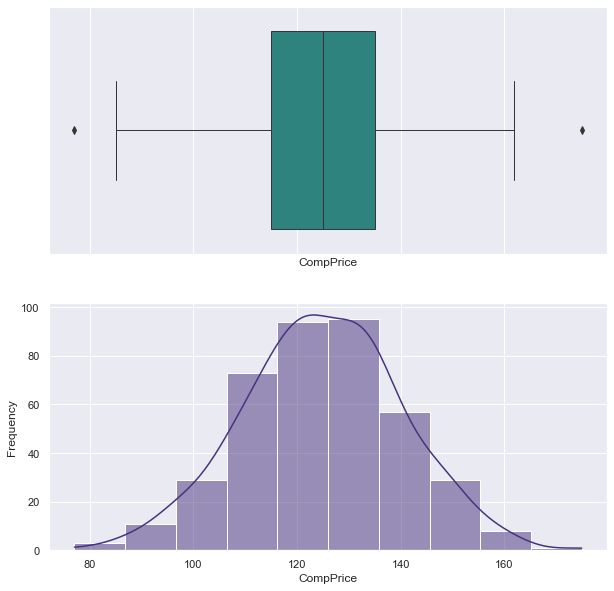

<Figure size 720x720 with 0 Axes>

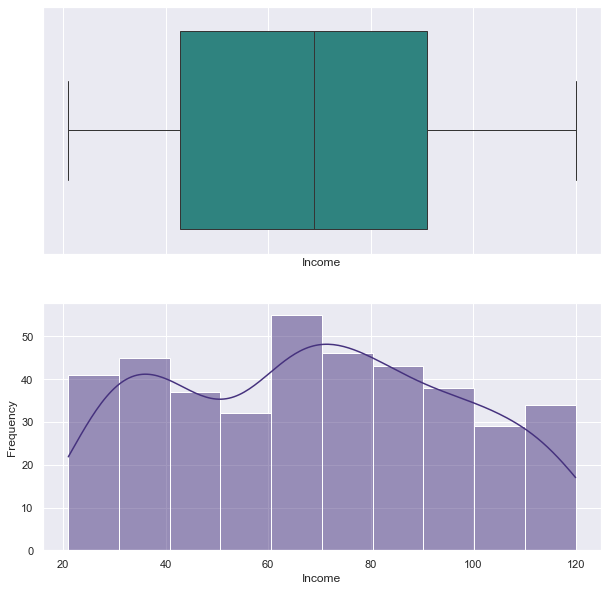

<Figure size 720x720 with 0 Axes>

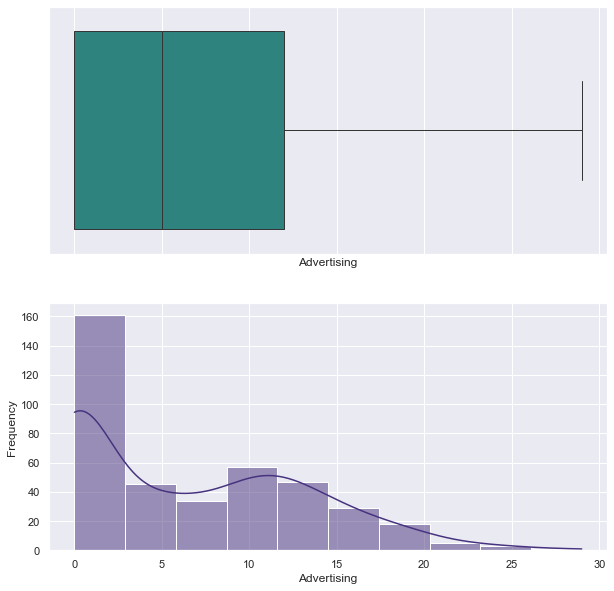

<Figure size 720x720 with 0 Axes>

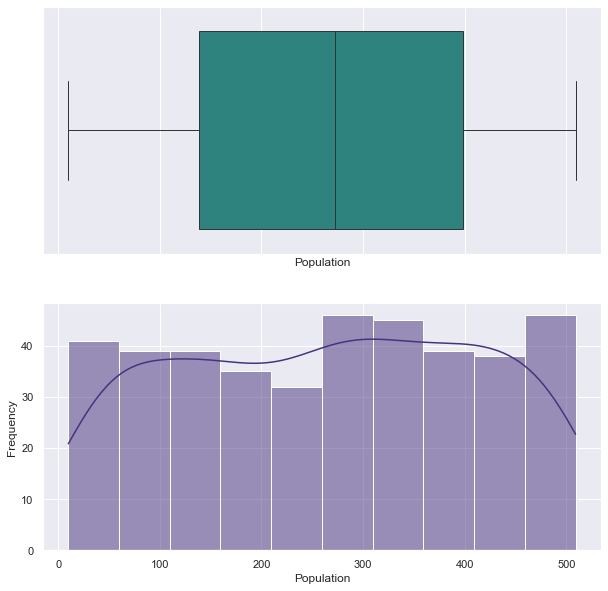

<Figure size 720x720 with 0 Axes>

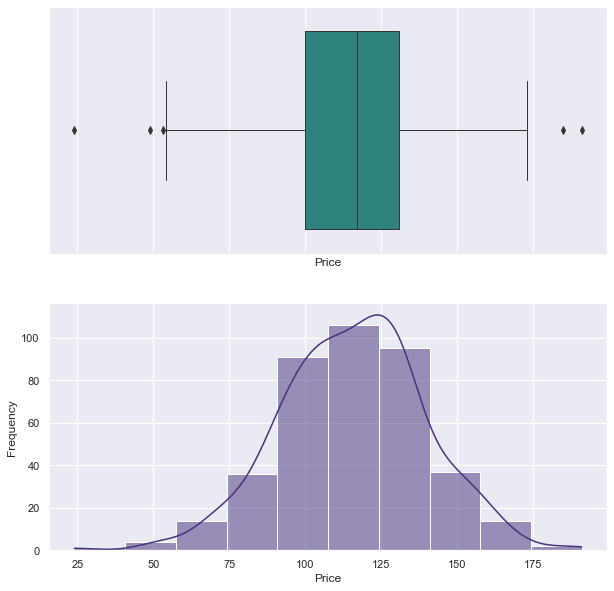

<Figure size 720x720 with 0 Axes>

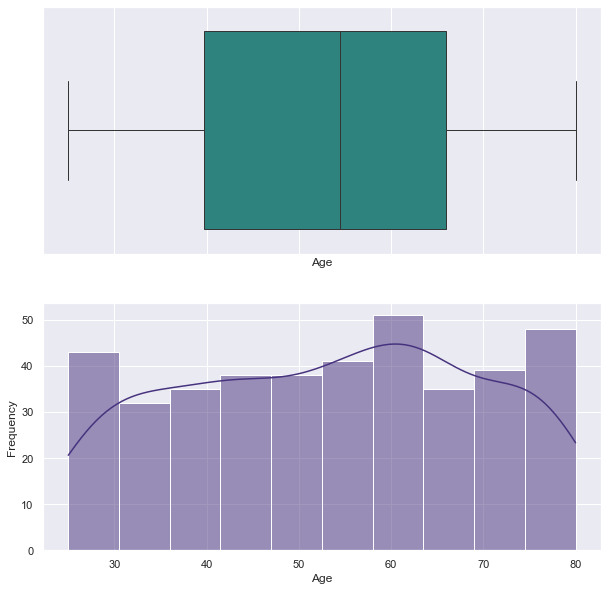

<Figure size 720x720 with 0 Axes>

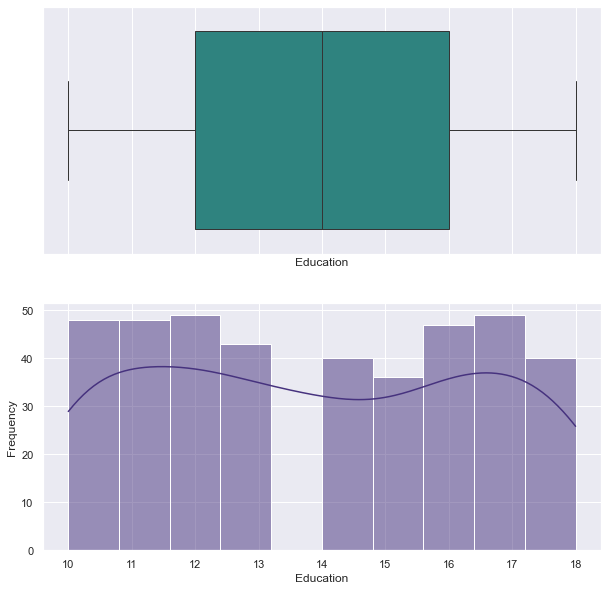

In [15]:
for i in numeric:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(10, 10)}, palette="viridis")
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(df[i], ax=ax_box , linewidth= 1.0, palette="viridis")
    sns.histplot(df[i], ax=ax_hist , bins = 10,kde=True, palette="viridis")

<AxesSubplot:>

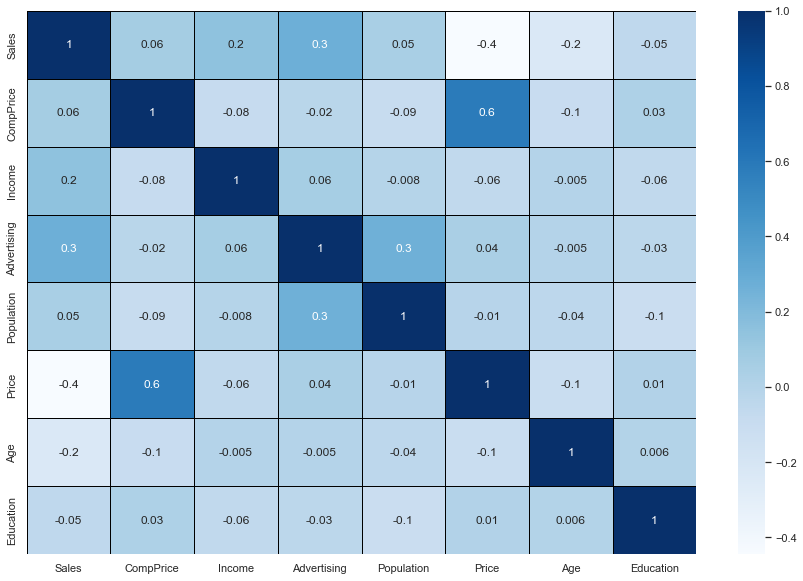

In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap="Blues",linecolor='black', linewidths=0.5, fmt='.1g')

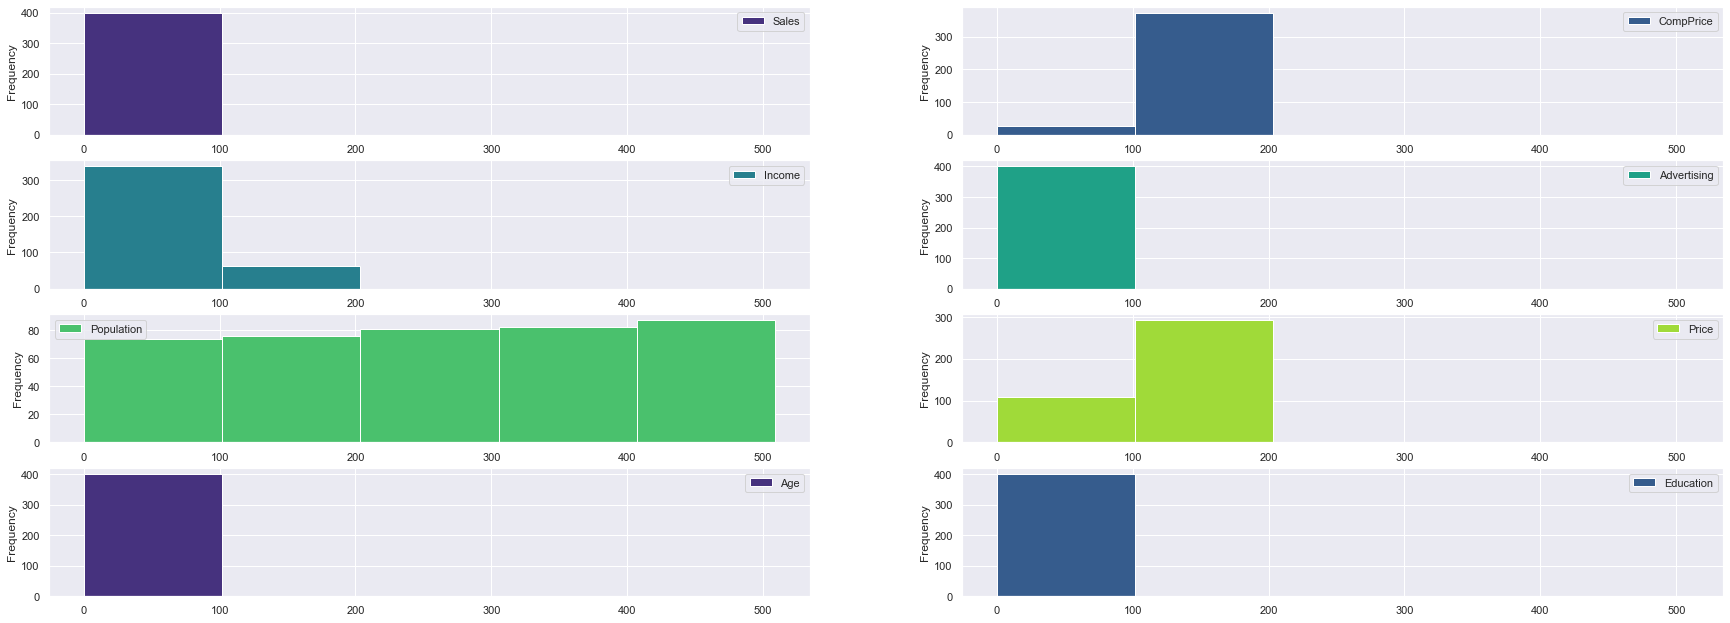

In [17]:
plt.rcParams['figure.figsize']=(30,25)

df.plot(kind='hist', bins=5, subplots=True, layout=(9,2), sharex=False, sharey=False)

plt.show()

### Applying encoding for catogorical Data

In [18]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(handle_unknown="ignore", sparse=False)

data=df.copy()

columns1=['ShelveLoc' ,'Urban','US']


for i in columns1:
   x=pd.DataFrame(ohe.fit_transform(data[[i]]), columns=data[i].unique())
   data = pd.concat([x,data], axis=1, join="inner").drop(i,axis=1)


data

Yes   No  Yes   No  Bad  Good  Medium  Sales  CompPrice  Income  \
0    0.0  1.0  0.0  1.0  1.0   0.0     0.0   9.50        138      73   
1    0.0  1.0  0.0  1.0  0.0   1.0     0.0  11.22        111      48   
2    0.0  1.0  0.0  1.0  0.0   0.0     1.0  10.06        113      35   
3    0.0  1.0  0.0  1.0  0.0   0.0     1.0   7.40        117     100   
4    1.0  0.0  0.0  1.0  1.0   0.0     0.0   4.15        141      64   
..   ...  ...  ...  ...  ...   ...     ...    ...        ...     ...   
395  0.0  1.0  0.0  1.0  0.0   1.0     0.0  12.57        138     108   
396  0.0  1.0  1.0  0.0  0.0   0.0     1.0   6.14        139      23   
397  0.0  1.0  0.0  1.0  0.0   0.0     1.0   7.41        162      26   
398  0.0  1.0  0.0  1.0  1.0   0.0     0.0   5.94        100      79   
399  0.0  1.0  0.0  1.0  0.0   1.0     0.0   9.71        134      37   

     Advertising  Population  Price  Age  Education  
0             11         276    120   42         17  
1             16         260     83   65         10  
2             10         269     80   59         12  
3              4         466     97   55         14  
4              3         340    128   38         13  
..           ...         ...    ...  ...        ...  
395           17         203    128   33         14  
396            3          37    120   55         11  
397           12         368    159   40         18  
398            7         284     95   50         12  
399            0          27    120   49         16  

[400 rows x 15 columns]

In [19]:
data["Sales"].mean()

7.496325

*  **As a cloth manufacturing company is interested to know about the segment or attributes causes high sale,so trying to divide the high sales and low sales**

In [20]:
data.loc[data["Sales"] <= 7.496325,"Sales_transform"]="0"
data.loc[data["Sales"] >= 7.496325,"Sales_transform"]="1"
data

Yes   No  Yes   No  Bad  Good  Medium  Sales  CompPrice  Income  \
0    0.0  1.0  0.0  1.0  1.0   0.0     0.0   9.50        138      73   
1    0.0  1.0  0.0  1.0  0.0   1.0     0.0  11.22        111      48   
2    0.0  1.0  0.0  1.0  0.0   0.0     1.0  10.06        113      35   
3    0.0  1.0  0.0  1.0  0.0   0.0     1.0   7.40        117     100   
4    1.0  0.0  0.0  1.0  1.0   0.0     0.0   4.15        141      64   
..   ...  ...  ...  ...  ...   ...     ...    ...        ...     ...   
395  0.0  1.0  0.0  1.0  0.0   1.0     0.0  12.57        138     108   
396  0.0  1.0  1.0  0.0  0.0   0.0     1.0   6.14        139      23   
397  0.0  1.0  0.0  1.0  0.0   0.0     1.0   7.41        162      26   
398  0.0  1.0  0.0  1.0  1.0   0.0     0.0   5.94        100      79   
399  0.0  1.0  0.0  1.0  0.0   1.0     0.0   9.71        134      37   

     Advertising  Population  Price  Age  Education Sales_transform  
0             11         276    120   42         17               1  
1             16         260     83   65         10               1  
2             10         269     80   59         12               1  
3              4         466     97   55         14               0  
4              3         340    128   38         13               0  
..           ...         ...    ...  ...        ...             ...  
395           17         203    128   33         14               1  
396            3          37    120   55         11               0  
397           12         368    159   40         18               0  
398            7         284     95   50         12               0  
399            0          27    120   49         16               1  

[400 rows x 16 columns]

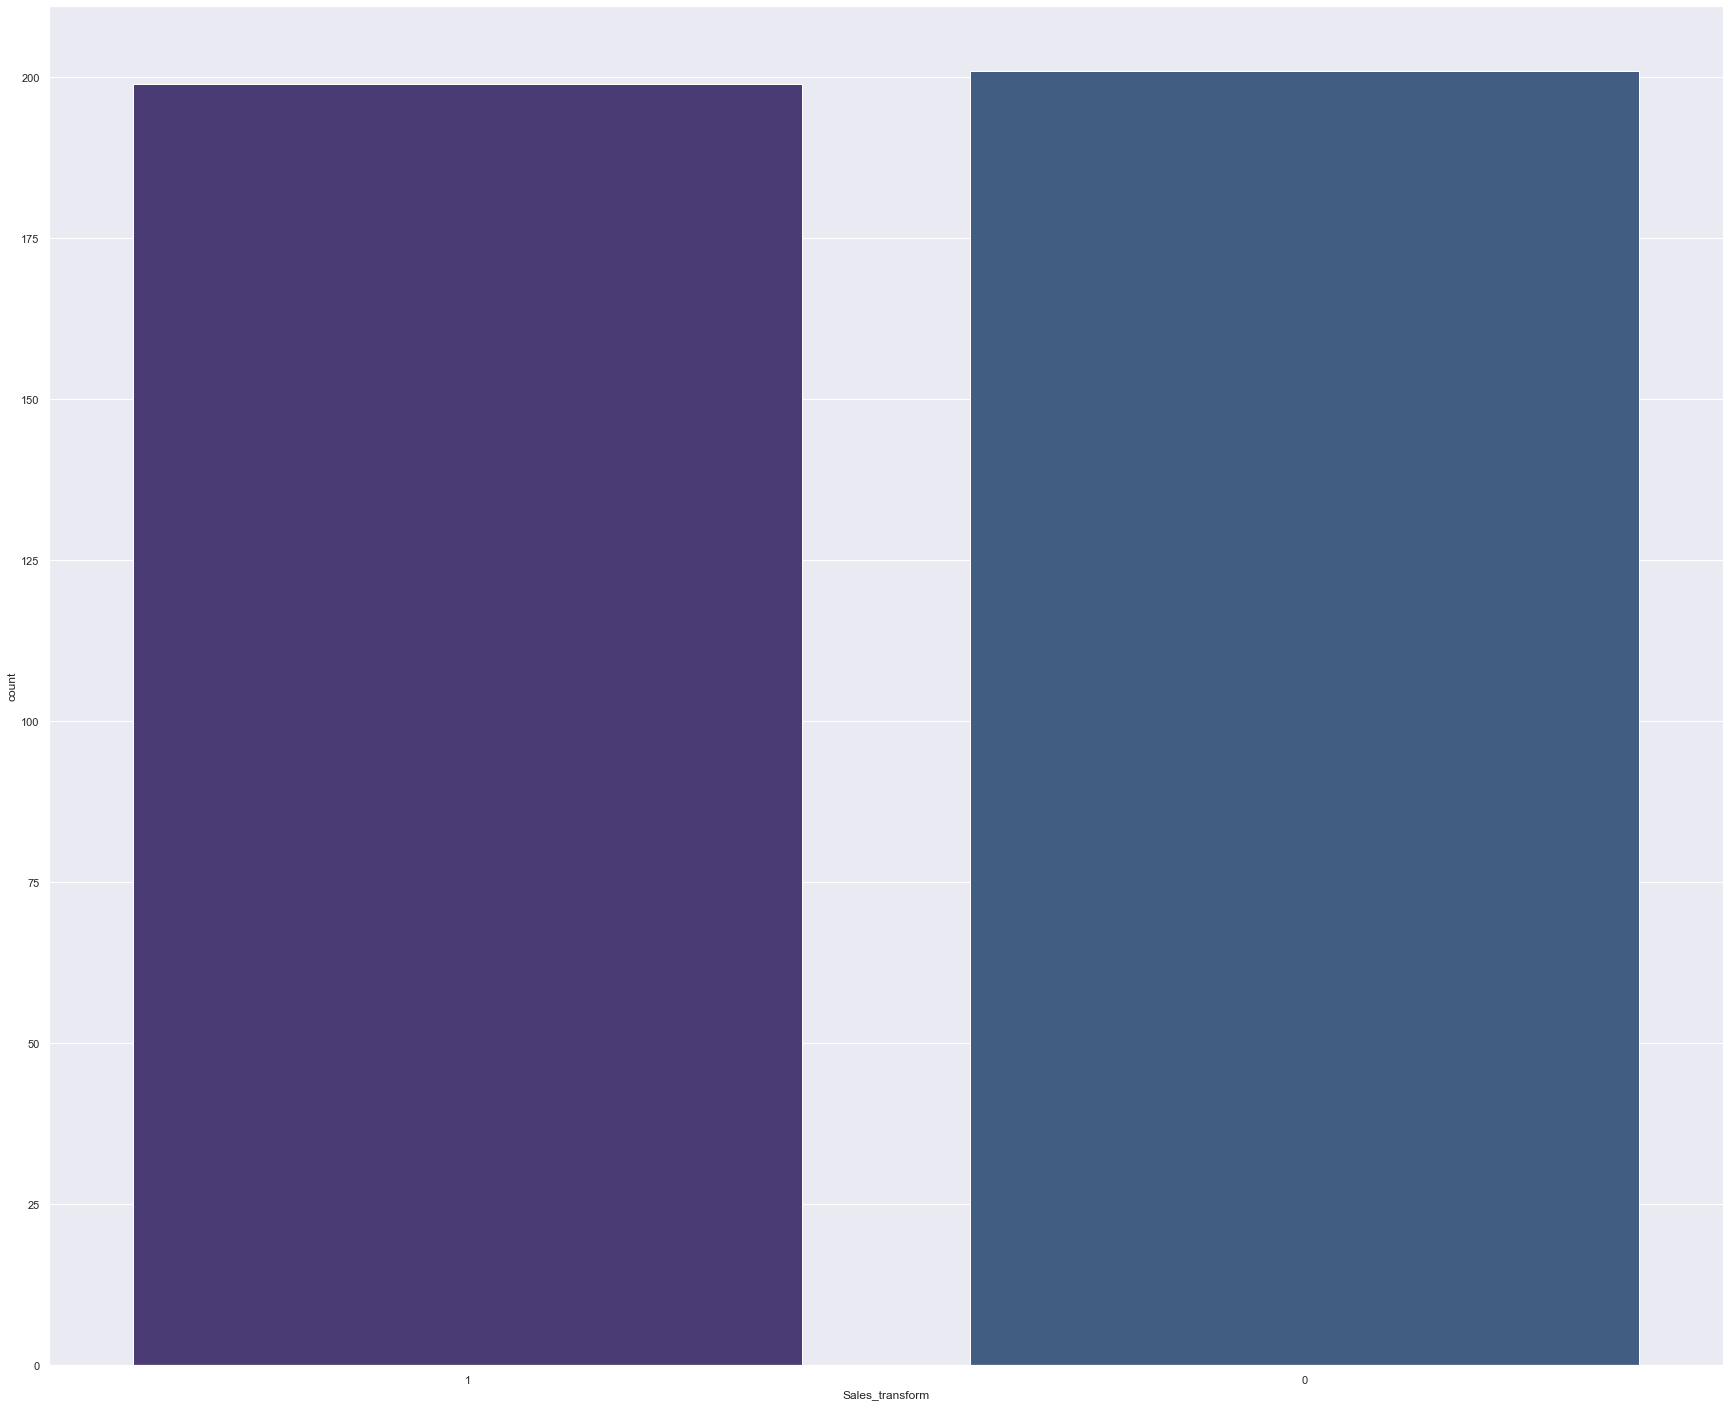

In [21]:
sns.countplot(data["Sales_transform"])
plt.show()

### Feature Scalling:

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data)
scaled_data = scaler.transform(data)
scaled_data

array([[0.        , 1.        , 0.        , ..., 0.30909091, 0.875     ,
        1.        ],
       [0.        , 1.        , 0.        , ..., 0.72727273, 0.        ,
        1.        ],
       [0.        , 1.        , 0.        , ..., 0.61818182, 0.25      ,
        1.        ],
       ...,
       [0.        , 1.        , 0.        , ..., 0.27272727, 1.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.45454545, 0.25      ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.43636364, 0.75      ,
        1.        ]])

In [23]:
scaled_data = pd.DataFrame(scaled_data, columns = data.columns)
scaled_data

Yes   No  Yes   No  Bad  Good  Medium     Sales  CompPrice    Income  \
0    0.0  1.0  0.0  1.0  1.0   0.0     0.0  0.583897   0.622449  0.525253   
1    0.0  1.0  0.0  1.0  0.0   1.0     0.0  0.689613   0.346939  0.272727   
2    0.0  1.0  0.0  1.0  0.0   0.0     1.0  0.618316   0.367347  0.141414   
3    0.0  1.0  0.0  1.0  0.0   0.0     1.0  0.454825   0.408163  0.797980   
4    1.0  0.0  0.0  1.0  1.0   0.0     0.0  0.255071   0.653061  0.434343   
..   ...  ...  ...  ...  ...   ...     ...       ...        ...       ...   
395  0.0  1.0  0.0  1.0  0.0   1.0     0.0  0.772588   0.622449  0.878788   
396  0.0  1.0  1.0  0.0  0.0   0.0     1.0  0.377382   0.632653  0.020202   
397  0.0  1.0  0.0  1.0  0.0   0.0     1.0  0.455439   0.867347  0.050505   
398  0.0  1.0  0.0  1.0  1.0   0.0     0.0  0.365089   0.234694  0.585859   
399  0.0  1.0  0.0  1.0  0.0   1.0     0.0  0.596804   0.581633  0.161616   

     Advertising  Population     Price       Age  Education  Sales_transform  
0       0.379310    0.533066  0.574850  0.309091      0.875              1.0  
1       0.551724    0.501002  0.353293  0.727273      0.000              1.0  
2       0.344828    0.519038  0.335329  0.618182      0.250              1.0  
3       0.137931    0.913828  0.437126  0.545455      0.500              0.0  
4       0.103448    0.661323  0.622754  0.236364      0.375              0.0  
..           ...         ...       ...       ...        ...              ...  
395     0.586207    0.386774  0.622754  0.145455      0.500              1.0  
396     0.103448    0.054108  0.574850  0.545455      0.125              0.0  
397     0.413793    0.717435  0.808383  0.272727      1.000              0.0  
398     0.241379    0.549098  0.425150  0.454545      0.250              0.0  
399     0.000000    0.034068  0.574850  0.436364      0.750              1.0  

[400 rows x 16 columns]

In [24]:
scaled_data["Sales_transform"].value_counts()

0.0    201
1.0    199
Name: Sales_transform, dtype: int64

In [25]:
x = scaled_data.iloc[:,0:15]
y = scaled_data['Sales_transform']
x

Yes   No  Yes   No  Bad  Good  Medium     Sales  CompPrice    Income  \
0    0.0  1.0  0.0  1.0  1.0   0.0     0.0  0.583897   0.622449  0.525253   
1    0.0  1.0  0.0  1.0  0.0   1.0     0.0  0.689613   0.346939  0.272727   
2    0.0  1.0  0.0  1.0  0.0   0.0     1.0  0.618316   0.367347  0.141414   
3    0.0  1.0  0.0  1.0  0.0   0.0     1.0  0.454825   0.408163  0.797980   
4    1.0  0.0  0.0  1.0  1.0   0.0     0.0  0.255071   0.653061  0.434343   
..   ...  ...  ...  ...  ...   ...     ...       ...        ...       ...   
395  0.0  1.0  0.0  1.0  0.0   1.0     0.0  0.772588   0.622449  0.878788   
396  0.0  1.0  1.0  0.0  0.0   0.0     1.0  0.377382   0.632653  0.020202   
397  0.0  1.0  0.0  1.0  0.0   0.0     1.0  0.455439   0.867347  0.050505   
398  0.0  1.0  0.0  1.0  1.0   0.0     0.0  0.365089   0.234694  0.585859   
399  0.0  1.0  0.0  1.0  0.0   1.0     0.0  0.596804   0.581633  0.161616   

     Advertising  Population     Price       Age  Education  
0       0.379310    0.533066  0.574850  0.309091      0.875  
1       0.551724    0.501002  0.353293  0.727273      0.000  
2       0.344828    0.519038  0.335329  0.618182      0.250  
3       0.137931    0.913828  0.437126  0.545455      0.500  
4       0.103448    0.661323  0.622754  0.236364      0.375  
..           ...         ...       ...       ...        ...  
395     0.586207    0.386774  0.622754  0.145455      0.500  
396     0.103448    0.054108  0.574850  0.545455      0.125  
397     0.413793    0.717435  0.808383  0.272727      1.000  
398     0.241379    0.549098  0.425150  0.454545      0.250  
399     0.000000    0.034068  0.574850  0.436364      0.750  

[400 rows x 15 columns]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

In [27]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(280, 15)
(120, 15)
(280,)
(120,)


### Training the Random Forest Classification model on the Training data

In [28]:
rfc = RandomForestClassifier(bootstrap=True,n_estimators = 10,max_depth=4 , random_state = 42)
rfc.fit(X_train, y_train)


RandomForestClassifier(max_depth=4, n_estimators=10, random_state=42)

DecisionTreeClassifier(max_depth=4, max_features='sqrt',
                       random_state=1608637542)


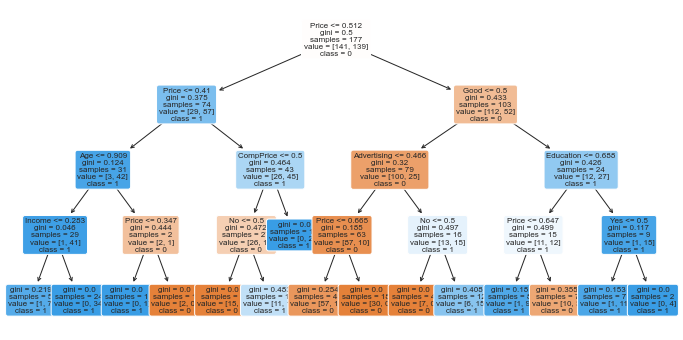

DecisionTreeClassifier(max_depth=4, max_features='sqrt',
                       random_state=1273642419)


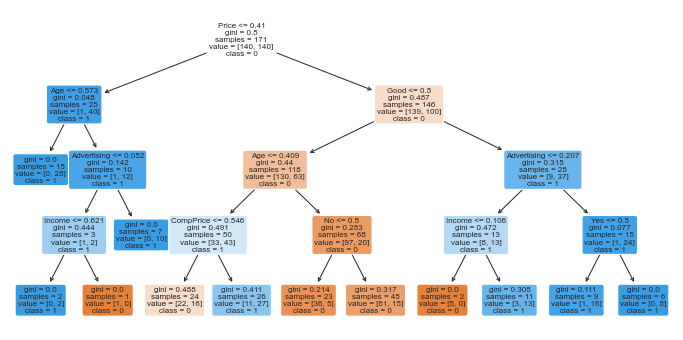

DecisionTreeClassifier(max_depth=4, max_features='sqrt',
                       random_state=1935803228)


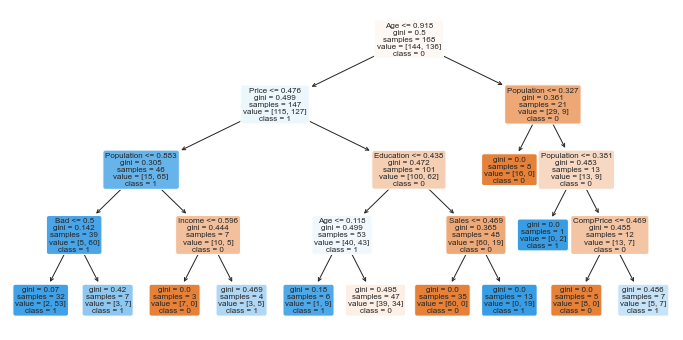

DecisionTreeClassifier(max_depth=4, max_features='sqrt', random_state=787846414)


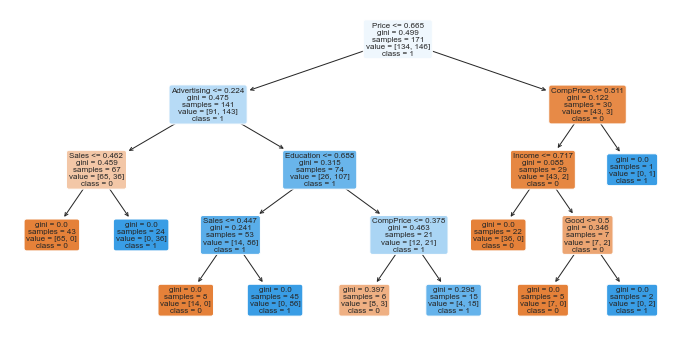

DecisionTreeClassifier(max_depth=4, max_features='sqrt', random_state=996406378)


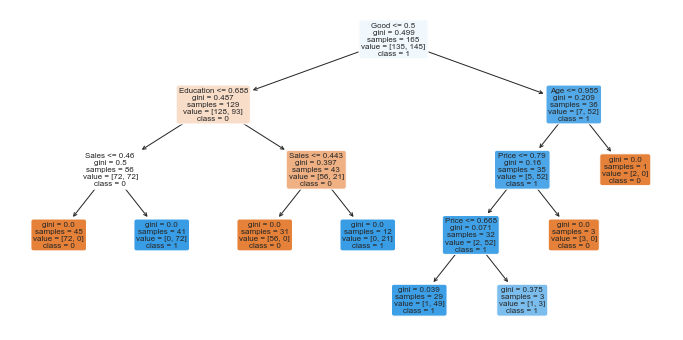

DecisionTreeClassifier(max_depth=4, max_features='sqrt',
                       random_state=1201263687)


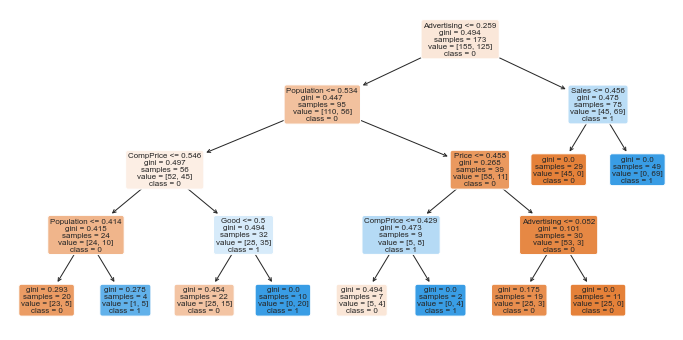

DecisionTreeClassifier(max_depth=4, max_features='sqrt', random_state=423734972)


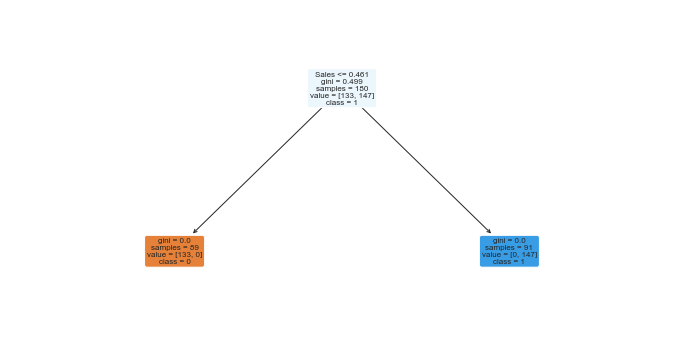

DecisionTreeClassifier(max_depth=4, max_features='sqrt', random_state=415968276)


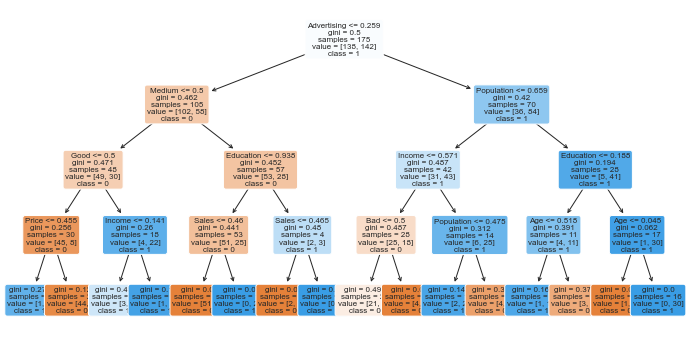

DecisionTreeClassifier(max_depth=4, max_features='sqrt', random_state=670094950)


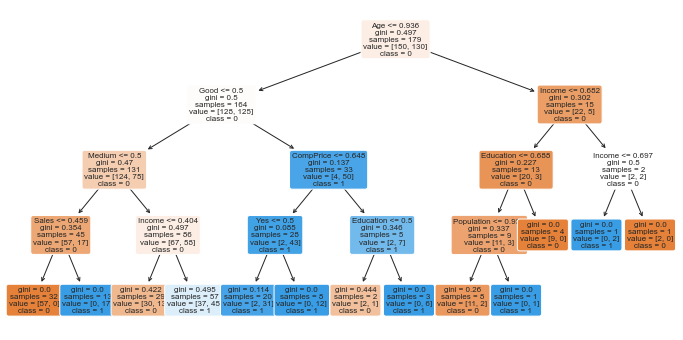

DecisionTreeClassifier(max_depth=4, max_features='sqrt',
                       random_state=1914837113)


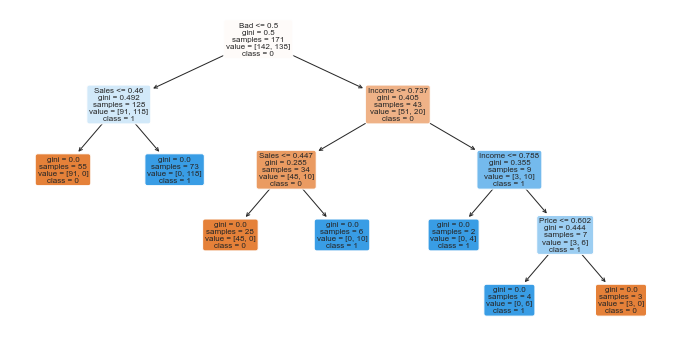

In [29]:
from sklearn import tree

features = x.columns.values # The name of each column
classes = ['0', '1', '2'] # The name of each class
# You can also use low, medium and high risks in the same order instead
# classes = ['low risk', 'medium risk', 'high risk']

for estimator in rfc.estimators_:
    print(estimator)
    plt.figure(figsize=(12,6))
    tree.plot_tree(estimator,
                   feature_names=features,
                   class_names=classes,
                   fontsize=8, 
                   filled=True, 
                   rounded=True)
    plt.show()

In [30]:
# Predict the test set labels
y_pred = rfc.predict(X_test)
pd.Series(y_pred).value_counts()

1.0    63
0.0    57
dtype: int64

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        58
         1.0       0.98      1.00      0.99        62

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



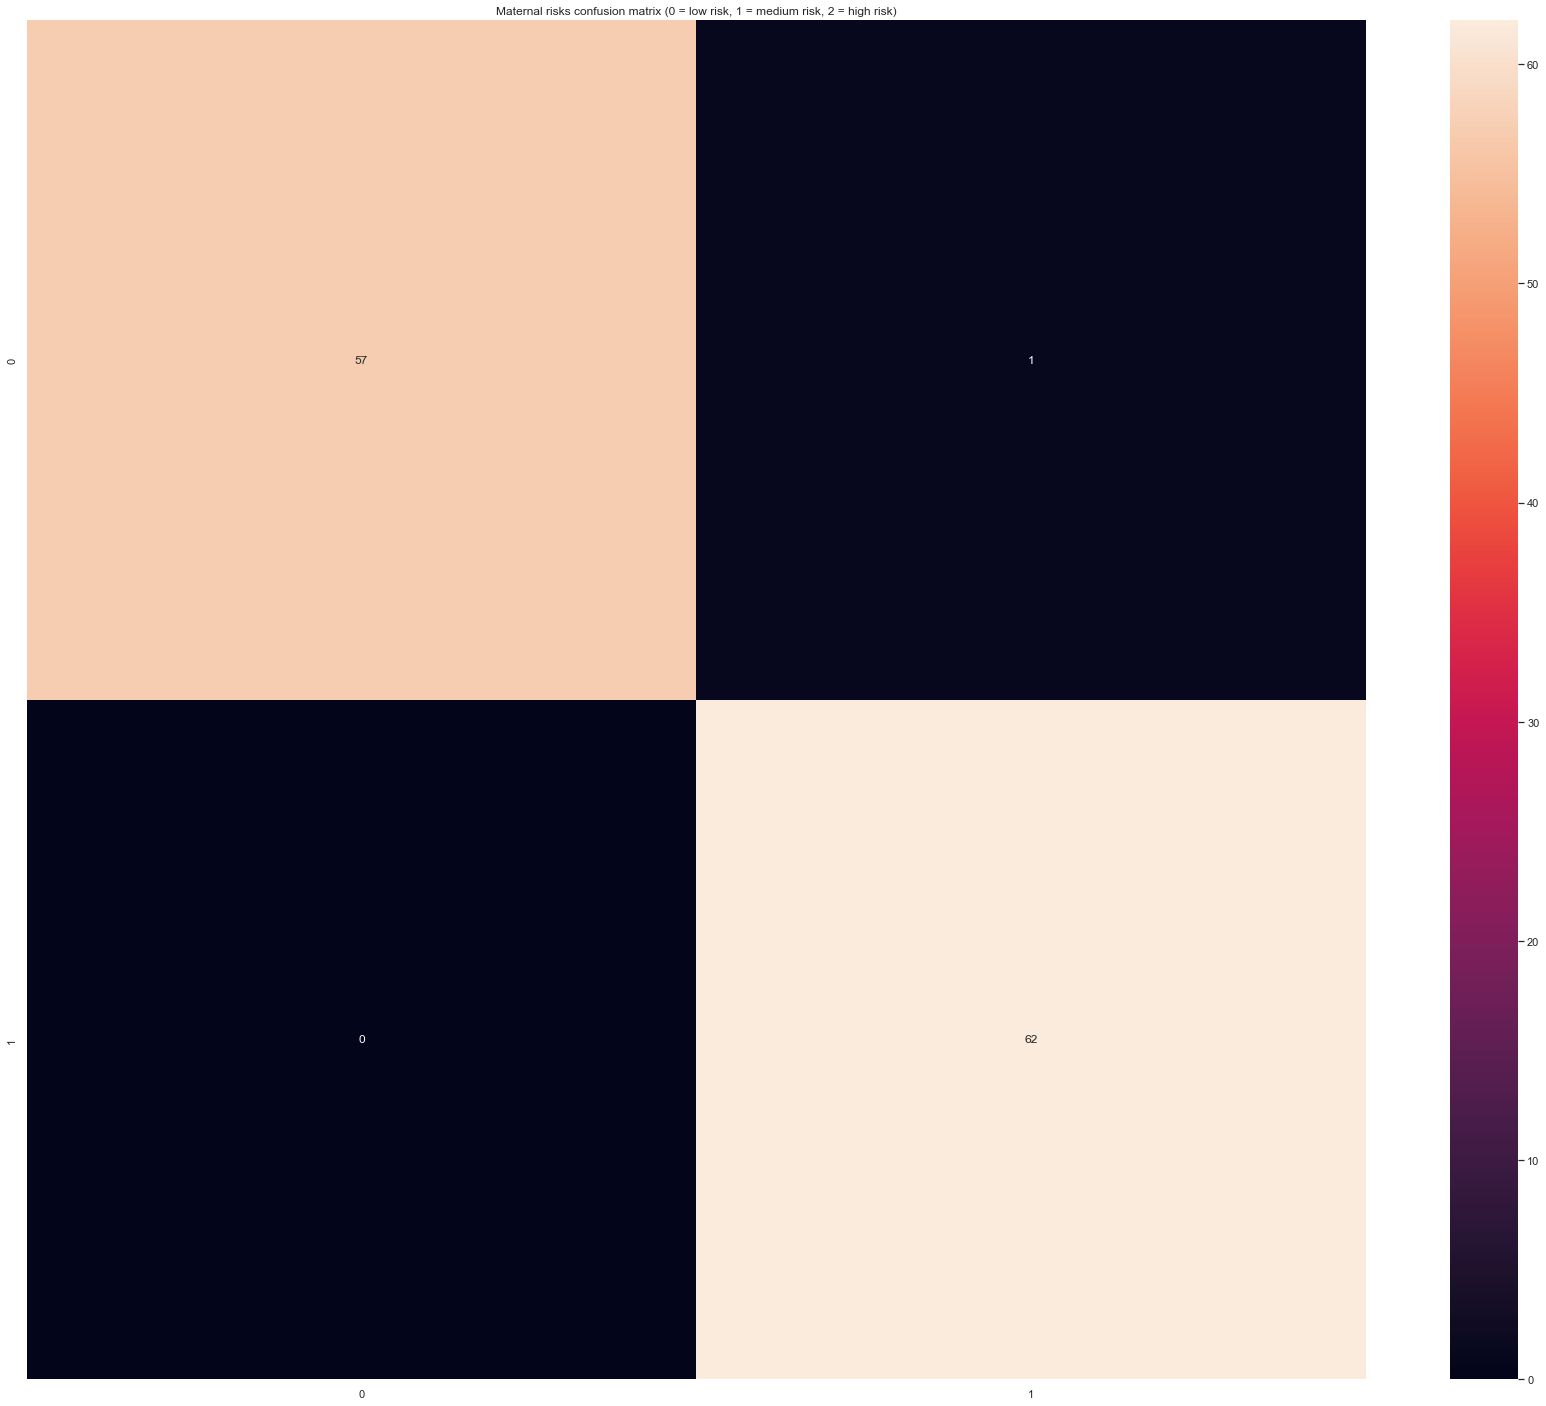

In [31]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d').set_title('Maternal risks confusion matrix (0 = low risk, 1 = medium risk, 2 = high risk)')

print(classification_report(y_test,y_pred))

In [32]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(rfc.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(rfc.score(X_test, y_test)))

Training set score: 0.9964
Test set score: 0.9917


In [33]:
df1 = pd.DataFrame({'actual': y_test, 'Entro_Prediction': y_pred})
df1.head()

actual  Entro_Prediction
398     0.0               0.0
125     1.0               1.0
328     0.0               0.0
339     1.0               1.0
172     1.0               1.0

<AxesSubplot:xlabel='Sales_transform', ylabel='Density'>

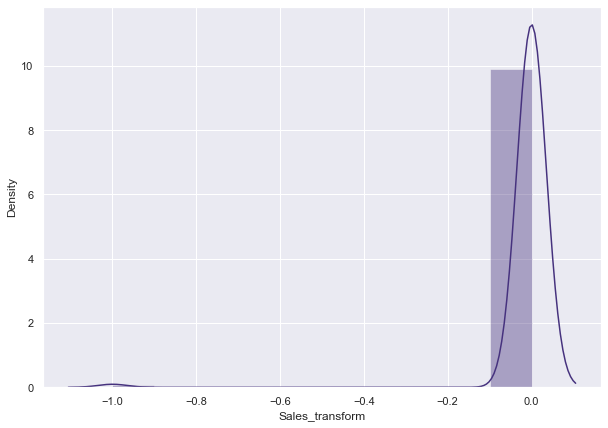

In [34]:
# checking difference between labled y and predicted y
plt.figure(figsize = (10,7))
sns.distplot(y_test-y_pred)

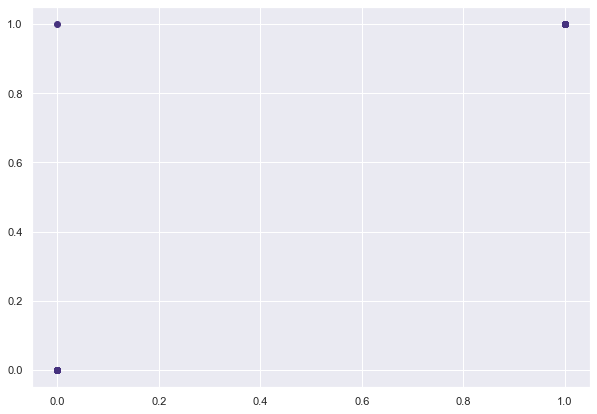

In [35]:
plt.figure(figsize = (10,7))
plt.scatter(y_test,y_pred)

In [36]:
# print the scores between dependent test and predicted value

print("Accuracy_score", accuracy_score(y_test,y_pred)*100)

Accuracy_score 99.16666666666667




 ROC AUC score: 0.9913793103448275 




Text(0, 0.5, 'True Positive Rate')

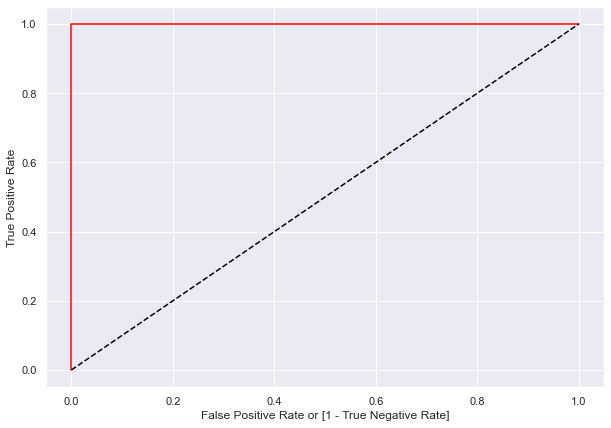

In [37]:
# plot ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_train, rfc.predict_proba (X_train)[:,1])

auc = roc_auc_score(y_test, y_pred)

plt.figure(figsize= (10,7))

plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')

print(f'\n\n ROC AUC score: {auc} \n\n')
plt.ylabel('True Positive Rate')

## Feature Importance:

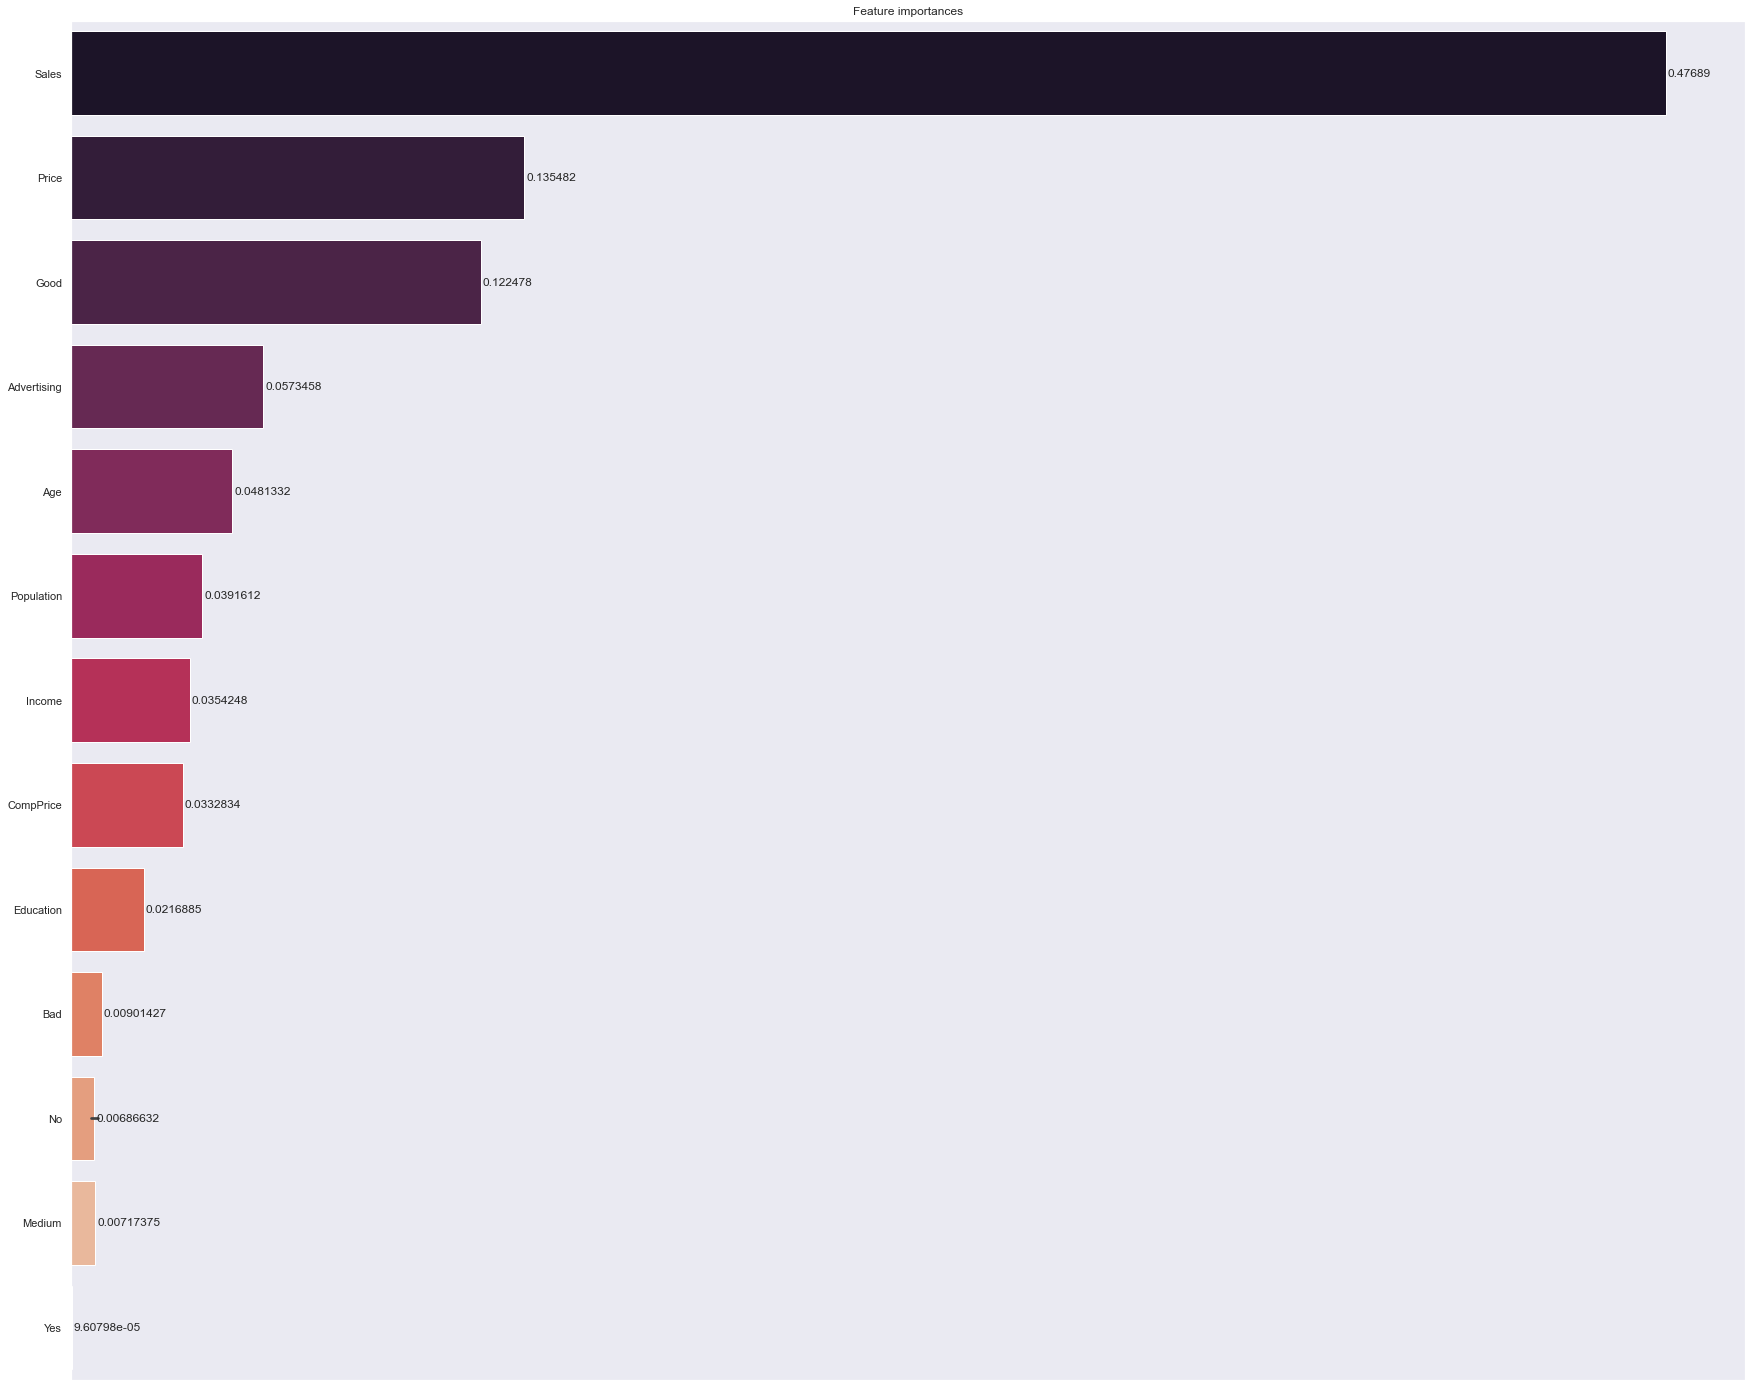

<Figure size 720x504 with 0 Axes>

In [38]:
features_df = pd.DataFrame({'features': rfc.feature_names_in_, 'importances': rfc.feature_importances_ })

# Sorting data from highest to lowest
features_df_sorted = features_df.sort_values(by='importances', ascending=False)

# Barplot of the result without borders and axis lines
g = sns.barplot(data=features_df_sorted, x='importances', y ='features', palette="rocket")
plt.figure(figsize = (10,7))
sns.despine(bottom = True, left = True)
g.set_title('Feature importances')
g.set(xlabel=None)
g.set(ylabel=None)
g.set(xticks=[])
for value in g.containers:
    g.bar_label(value, padding=2)

## Dataset:2 = Fraud_check

In [39]:
df =  pd.read_csv("C:\\Users\\Shivani Bhavsar\\OneDrive\\Documents\\ExcelR Assignment files\\DS\\A14 Decision Trees\\Fraud_check.csv")
df

Undergrad Marital.Status  Taxable.Income  City.Population  \
0          NO         Single           68833            50047   
1         YES       Divorced           33700           134075   
2          NO        Married           36925           160205   
3         YES         Single           50190           193264   
4          NO        Married           81002            27533   
..        ...            ...             ...              ...   
595       YES       Divorced           76340            39492   
596       YES       Divorced           69967            55369   
597        NO       Divorced           47334           154058   
598       YES        Married           98592           180083   
599        NO       Divorced           96519           158137   

     Work.Experience Urban  
0                 10   YES  
1                 18   YES  
2                 30   YES  
3                 15   YES  
4                 28    NO  
..               ...   ...  
595                7   YES  
596                2   YES  
597                0   YES  
598               17    NO  
599               16    NO  

[600 rows x 6 columns]

### Informarion:

Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

* Data Description :

Undergrad : person is under graduated or not
Marital.Status : marital status of a person
Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
Work Experience : Work experience of an individual person
Urban : Whether that person belongs to urban area or not

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [41]:
df.describe()

Taxable.Income  City.Population  Work.Experience
count      600.000000       600.000000       600.000000
mean     55208.375000    108747.368333        15.558333
std      26204.827597     49850.075134         8.842147
min      10003.000000     25779.000000         0.000000
25%      32871.500000     66966.750000         8.000000
50%      55074.500000    106493.500000        15.000000
75%      78611.750000    150114.250000        24.000000
max      99619.000000    199778.000000        30.000000

In [42]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [43]:
df.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [44]:
df.agg(["skew","kurt"])

Taxable.Income  City.Population  Work.Experience
skew        0.030015         0.125009         0.018529
kurt       -1.199782        -1.120154        -1.167524

In [45]:
for i in df.columns :
    print(i , '\n', df[i].value_counts())

Undergrad 
 YES    312
NO     288
Name: Undergrad, dtype: int64
Marital.Status 
 Single      217
Married     194
Divorced    189
Name: Marital.Status, dtype: int64
Taxable.Income 
 59689    2
68833    1
60822    1
93090    1
79373    1
        ..
61906    1
31088    1
70365    1
56536    1
96519    1
Name: Taxable.Income, Length: 599, dtype: int64
City.Population 
 57194     2
162777    2
50047     1
130912    1
64070     1
         ..
145744    1
58225     1
28661     1
117260    1
158137    1
Name: City.Population, Length: 598, dtype: int64
Work.Experience 
 10    31
13    28
30    25
28    25
12    25
14    24
11    23
21    23
5     22
27    22
26    22
7     21
29    21
19    21
16    19
6     19
25    19
2     19
17    18
15    18
24    17
23    16
20    15
0     14
1     14
8     14
3     14
4     14
22    13
9     13
18    11
Name: Work.Experience, dtype: int64
Urban 
 YES    302
NO     298
Name: Urban, dtype: int64


In [46]:
for i in df.columns:
    print(i , "\n" , df[i].unique())

Undergrad 
 ['NO' 'YES']
Marital.Status 
 ['Single' 'Divorced' 'Married']
Taxable.Income 
 [68833 33700 36925 50190 81002 33329 83357 62774 83519 98152 29732 61063
 11794 61830 64070 69869 24987 39476 97957 10987 88636 14310 78969 92040
 38239 31417 55299 87778 10379 94033 73854 64007 97200 82071 12514 31336
 10163 68513 14912 74010 50777 49436 96485 70339 33614 81079 31532 44034
 16264 45706 79616 40137 97703 21917 81939 19925 34703 78573 10870 65065
 94418 26972 91684 51685 62158 58312 42507 61486 10150 99619 89302 94287
 41344 41382 32434 61105 67628 31458 73411 10329 44947 35610 66564 87348
 69098 28449 39277 13747 86652 26741 77634 99325 85651 15296 10348 41395
 22258 79583 22187 52495 93078 35072 32662 89250 41641 55873 19169 46629
 51927 69224 24557 77762 96355 90910 21945 79357 42784 54638 29944 97318
 52022 20391 21016 26679 70682 87326 15853 75501 97984 53378 93458 56501
 46955 33492 35832 12470 53981 22773 84691 50087 27877 56647 59419 26783
 79453 33962 84429 63057 43128 40

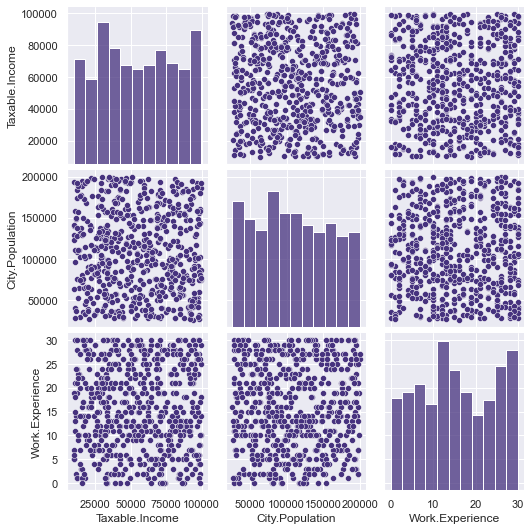

In [47]:
sns.pairplot(df)

In [48]:
# find categorical and numeric variables

categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :\n', categorical)
print('\n')
numeric = [var for var in df.columns if df[var].dtype!='O']
print('There are {} Numeric variables\n'.format(len(numeric)))
print('The Numeric variables are :\n', numeric)

There are 3 categorical variables

The categorical variables are :
 ['Undergrad', 'Marital.Status', 'Urban']


There are 3 Numeric variables

The Numeric variables are :
 ['Taxable.Income', 'City.Population', 'Work.Experience']


Skew: 0.030014788906377175
Kurtosis: -1.1997824607083138


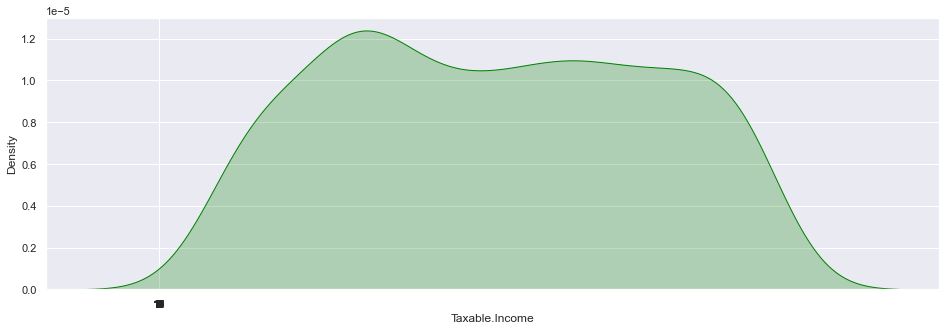

Skew: 0.12500898782679504
Kurtosis: -1.1201539229184019


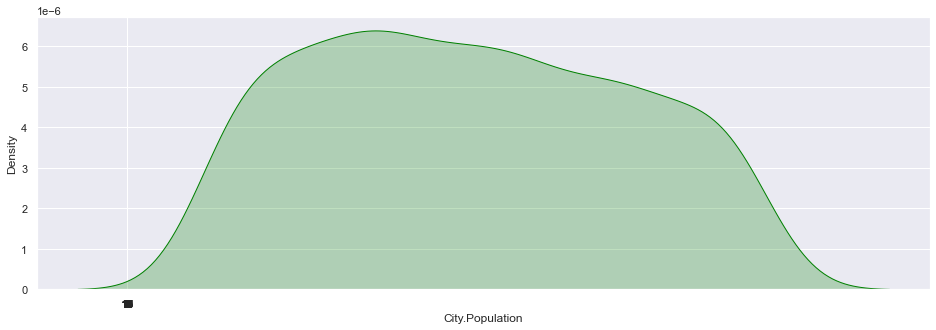

Skew: 0.01852862786533781
Kurtosis: -1.1675237113768457


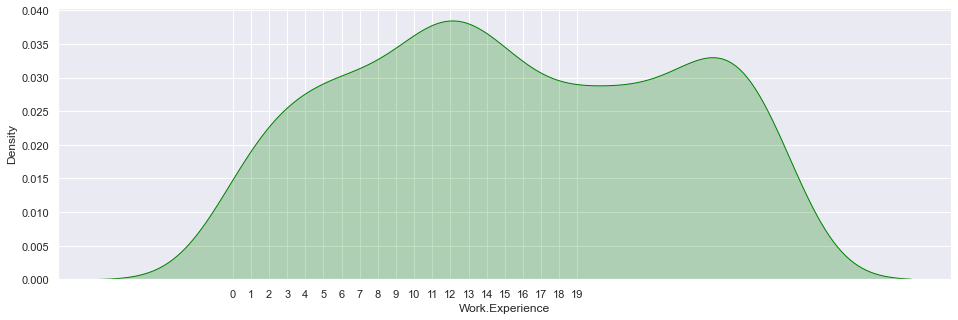

In [49]:
for i in numeric:
  plt.figure(figsize=(16,5))
  print("Skew: {}".format(df[i].skew()))
  print("Kurtosis: {}".format(df[i].kurtosis()))
  ax = sns.kdeplot(df[i],shade=True,color='g')
  plt.xticks([i for i in range(0,20,1)])
  plt.show()

<Figure size 2160x1800 with 0 Axes>

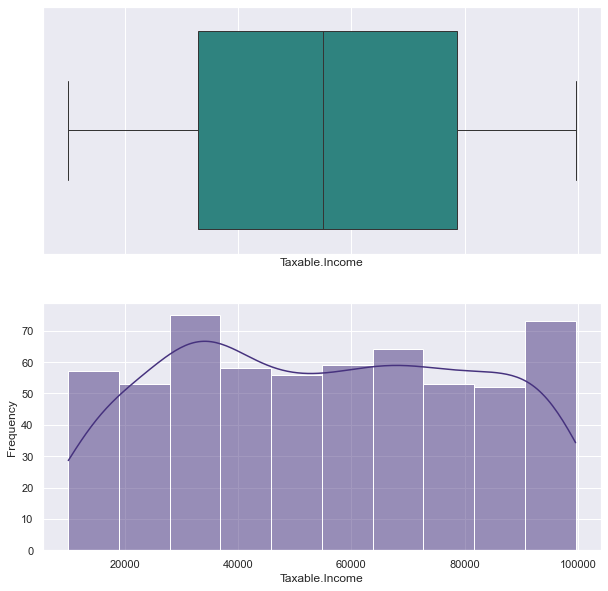

<Figure size 720x720 with 0 Axes>

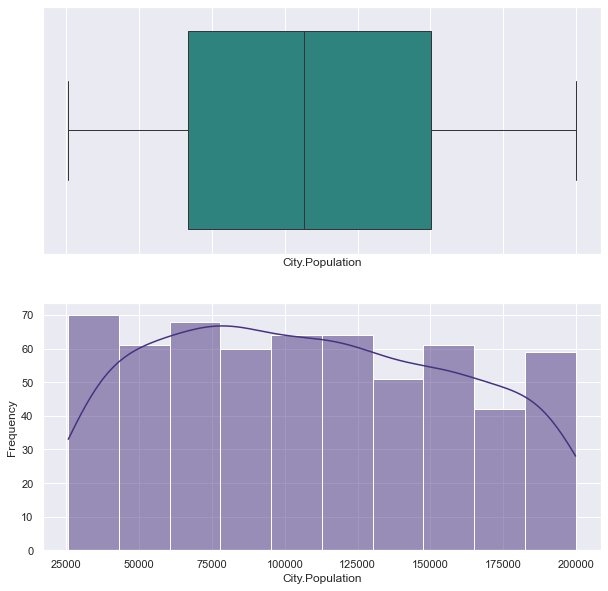

<Figure size 720x720 with 0 Axes>

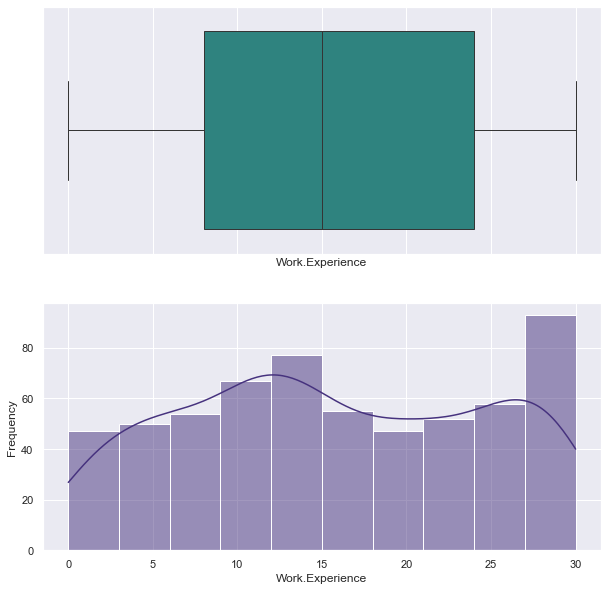

In [50]:
for i in numeric:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(10, 10)}, palette="viridis")
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(df[i], ax=ax_box , linewidth= 1.0, palette="viridis")
    sns.histplot(df[i], ax=ax_hist , bins = 10,kde=True, palette="viridis")

<AxesSubplot:>

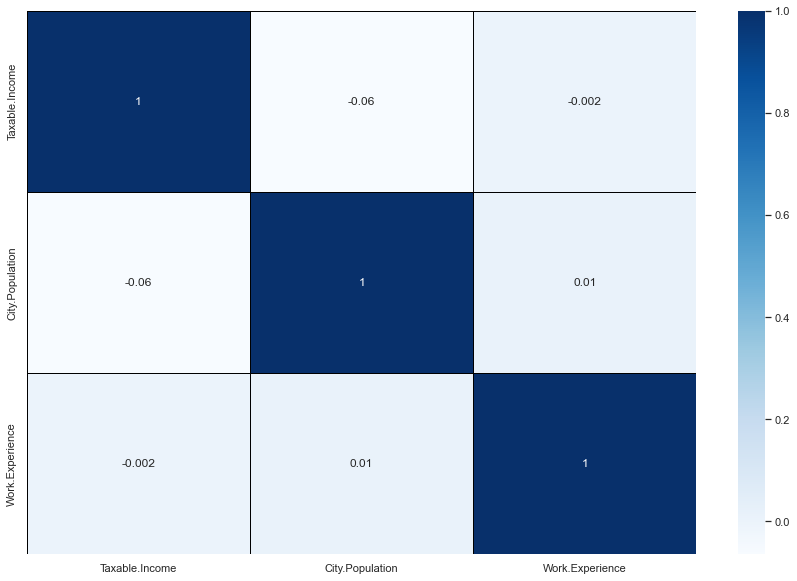

In [51]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap="Blues",linecolor='black', linewidths=0.5, fmt='.1g')

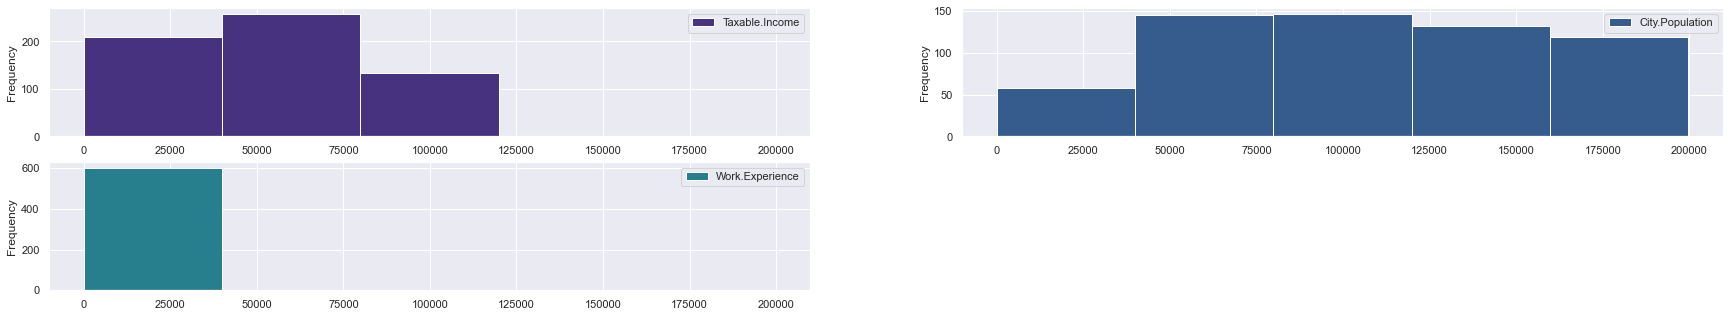

In [52]:
plt.rcParams['figure.figsize']=(30,25)

df.plot(kind='hist', bins=5, subplots=True, layout=(9,2), sharex=False, sharey=False)

plt.show()

## Data Prerocessing:

> Adding new column

In [53]:
# df["fraud"]= df["Taxable.Income"]
# df

### Coading dependent variavle 

In [54]:
df['Taxable.Income'] = np.where( df['Taxable.Income'] <= 30000, 1, 0)
df

Undergrad Marital.Status  Taxable.Income  City.Population  \
0          NO         Single               0            50047   
1         YES       Divorced               0           134075   
2          NO        Married               0           160205   
3         YES         Single               0           193264   
4          NO        Married               0            27533   
..        ...            ...             ...              ...   
595       YES       Divorced               0            39492   
596       YES       Divorced               0            55369   
597        NO       Divorced               0           154058   
598       YES        Married               0           180083   
599        NO       Divorced               0           158137   

     Work.Experience Urban  
0                 10   YES  
1                 18   YES  
2                 30   YES  
3                 15   YES  
4                 28    NO  
..               ...   ...  
595                7   YES  
596                2   YES  
597                0   YES  
598               17    NO  
599               16    NO  

[600 rows x 6 columns]

In [55]:
df['Taxable.Income'].value_counts()

0    476
1    124
Name: Taxable.Income, dtype: int64

In [56]:
### Applying encoding for catogorical Data

from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(handle_unknown="ignore", sparse=False)

data=df.copy()

columns1=['Undergrad','Marital.Status','Urban']


for i in columns1:
   x=pd.DataFrame(ohe.fit_transform(data[[i]]), columns=data[i].unique())
   data = pd.concat([x,data], axis=1, join="inner").drop(i,axis=1)


data


YES   NO  Single  Divorced  Married   NO  YES  Taxable.Income  \
0    0.0  1.0     0.0       0.0      1.0  1.0  0.0               0   
1    0.0  1.0     1.0       0.0      0.0  0.0  1.0               0   
2    0.0  1.0     0.0       1.0      0.0  1.0  0.0               0   
3    0.0  1.0     0.0       0.0      1.0  0.0  1.0               0   
4    1.0  0.0     0.0       1.0      0.0  1.0  0.0               0   
..   ...  ...     ...       ...      ...  ...  ...             ...   
595  0.0  1.0     1.0       0.0      0.0  0.0  1.0               0   
596  0.0  1.0     1.0       0.0      0.0  0.0  1.0               0   
597  0.0  1.0     1.0       0.0      0.0  1.0  0.0               0   
598  1.0  0.0     0.0       1.0      0.0  0.0  1.0               0   
599  1.0  0.0     1.0       0.0      0.0  1.0  0.0               0   

     City.Population  Work.Experience  
0              50047               10  
1             134075               18  
2             160205               30  
3             193264               15  
4              27533               28  
..               ...              ...  
595            39492                7  
596            55369                2  
597           154058                0  
598           180083               17  
599           158137               16  

[600 rows x 10 columns]

In [57]:
data.columns

Index(['YES', 'NO', 'Single', 'Divorced', 'Married', 'NO', 'YES',
       'Taxable.Income', 'City.Population', 'Work.Experience'],
      dtype='object')

In [58]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data)
scaled_data = scaler.transform(data)
scaled_data

array([[0.        , 1.        , 0.        , ..., 0.        , 0.13947207,
        0.33333333],
       [0.        , 1.        , 1.        , ..., 0.        , 0.62239438,
        0.6       ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.77256766,
        1.        ],
       ...,
       [0.        , 1.        , 1.        , ..., 0.        , 0.73723987,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.        , 0.88680969,
        0.56666667],
       [1.        , 0.        , 1.        , ..., 0.        , 0.76068253,
        0.53333333]])

In [59]:
scaled_data=pd.DataFrame(scaler.fit_transform(data),columns=data.columns, index=data.index)
scaled_data

YES   NO  Single  Divorced  Married   NO  YES  Taxable.Income  \
0    0.0  1.0     0.0       0.0      1.0  1.0  0.0             0.0   
1    0.0  1.0     1.0       0.0      0.0  0.0  1.0             0.0   
2    0.0  1.0     0.0       1.0      0.0  1.0  0.0             0.0   
3    0.0  1.0     0.0       0.0      1.0  0.0  1.0             0.0   
4    1.0  0.0     0.0       1.0      0.0  1.0  0.0             0.0   
..   ...  ...     ...       ...      ...  ...  ...             ...   
595  0.0  1.0     1.0       0.0      0.0  0.0  1.0             0.0   
596  0.0  1.0     1.0       0.0      0.0  0.0  1.0             0.0   
597  0.0  1.0     1.0       0.0      0.0  1.0  0.0             0.0   
598  1.0  0.0     0.0       1.0      0.0  0.0  1.0             0.0   
599  1.0  0.0     1.0       0.0      0.0  1.0  0.0             0.0   

     City.Population  Work.Experience  
0           0.139472         0.333333  
1           0.622394         0.600000  
2           0.772568         1.000000  
3           0.962563         0.500000  
4           0.010081         0.933333  
..               ...              ...  
595         0.078811         0.233333  
596         0.170058         0.066667  
597         0.737240         0.000000  
598         0.886810         0.566667  
599         0.760683         0.533333  

[600 rows x 10 columns]

In [60]:
x_data=scaled_data.drop(['Taxable.Income'], axis=1)
y_data=scaled_data["Taxable.Income"]
x_data

YES   NO  Single  Divorced  Married   NO  YES  City.Population  \
0    0.0  1.0     0.0       0.0      1.0  1.0  0.0         0.139472   
1    0.0  1.0     1.0       0.0      0.0  0.0  1.0         0.622394   
2    0.0  1.0     0.0       1.0      0.0  1.0  0.0         0.772568   
3    0.0  1.0     0.0       0.0      1.0  0.0  1.0         0.962563   
4    1.0  0.0     0.0       1.0      0.0  1.0  0.0         0.010081   
..   ...  ...     ...       ...      ...  ...  ...              ...   
595  0.0  1.0     1.0       0.0      0.0  0.0  1.0         0.078811   
596  0.0  1.0     1.0       0.0      0.0  0.0  1.0         0.170058   
597  0.0  1.0     1.0       0.0      0.0  1.0  0.0         0.737240   
598  1.0  0.0     0.0       1.0      0.0  0.0  1.0         0.886810   
599  1.0  0.0     1.0       0.0      0.0  1.0  0.0         0.760683   

     Work.Experience  
0           0.333333  
1           0.600000  
2           1.000000  
3           0.500000  
4           0.933333  
..               ...  
595         0.233333  
596         0.066667  
597         0.000000  
598         0.566667  
599         0.533333  

[600 rows x 9 columns]

In [61]:
scaled_data["Taxable.Income"].value_counts()

0.0    476
1.0    124
Name: Taxable.Income, dtype: int64

* Here the data is imbalanced ,so for balancing here we use SMOTE to resample the data.

In [62]:
x= np.array(x_data)
y= np.array(y_data)

In [63]:
import imblearn
from imblearn.over_sampling import SMOTE
over_sampler = SMOTE(random_state=42)
X_res, y_res = over_sampler.fit_resample(x, y)

In [64]:
# Splitting data into training and testing data set
x_train, x_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.30, random_state=42)

In [65]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(666, 9)
(286, 9)
(666,)
(286,)


In [66]:
pd.Series(y_test).value_counts()

0.0    146
1.0    140
dtype: int64

### Training the Random Forest Classification model on the Training data

In [67]:
rfc = RandomForestClassifier(bootstrap=True,n_estimators = 12 ,max_depth=5 , random_state = 42)
rfc.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=12, random_state=42)

DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                       random_state=1608637542)


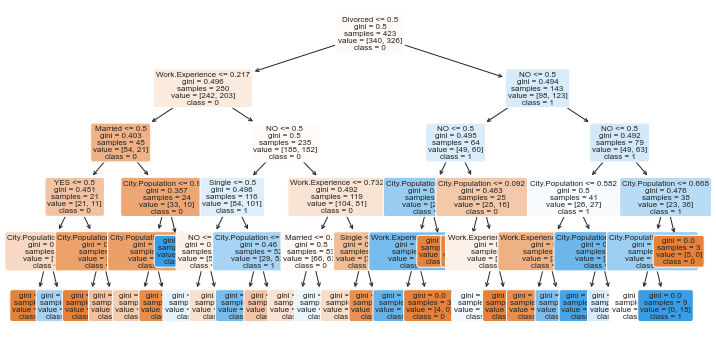

DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                       random_state=1273642419)


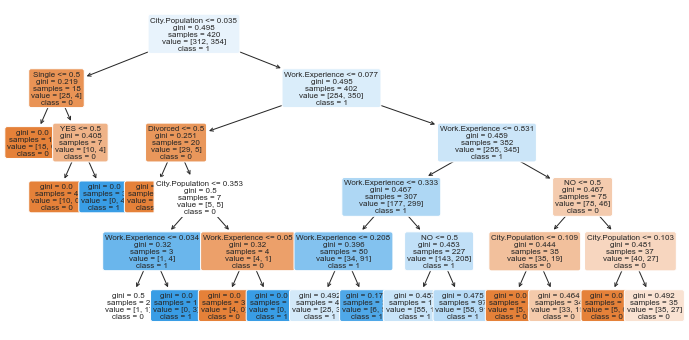

DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                       random_state=1935803228)


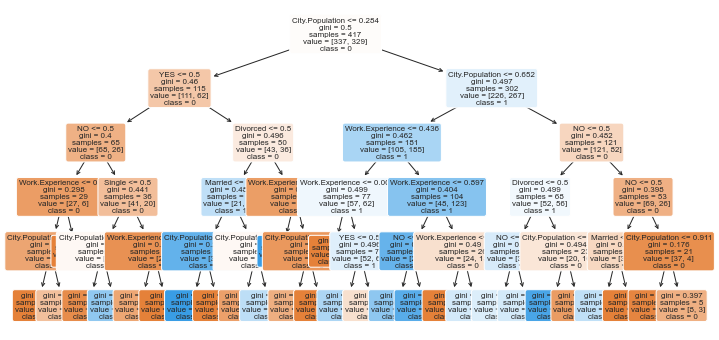

DecisionTreeClassifier(max_depth=5, max_features='sqrt', random_state=787846414)


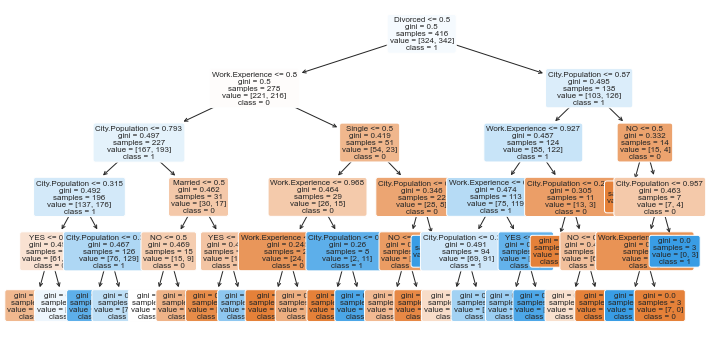

DecisionTreeClassifier(max_depth=5, max_features='sqrt', random_state=996406378)


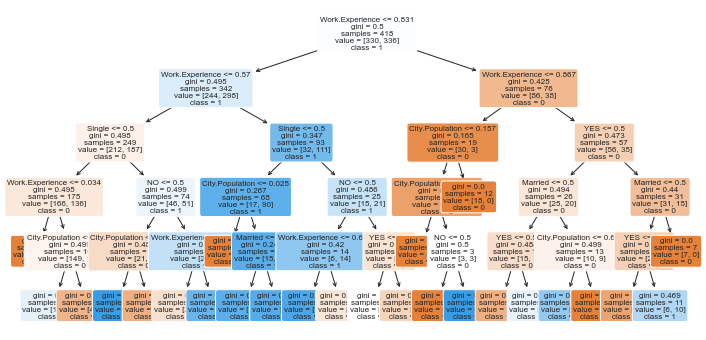

DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                       random_state=1201263687)


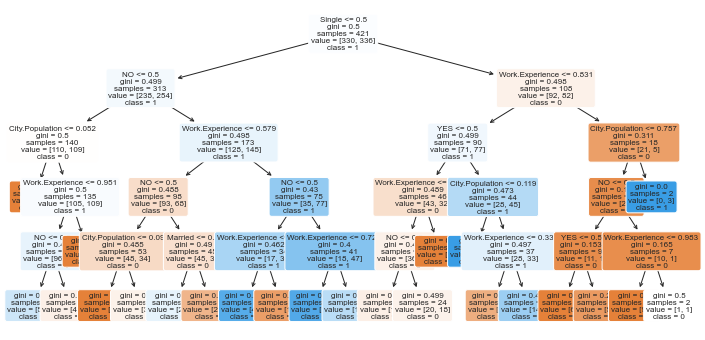

DecisionTreeClassifier(max_depth=5, max_features='sqrt', random_state=423734972)


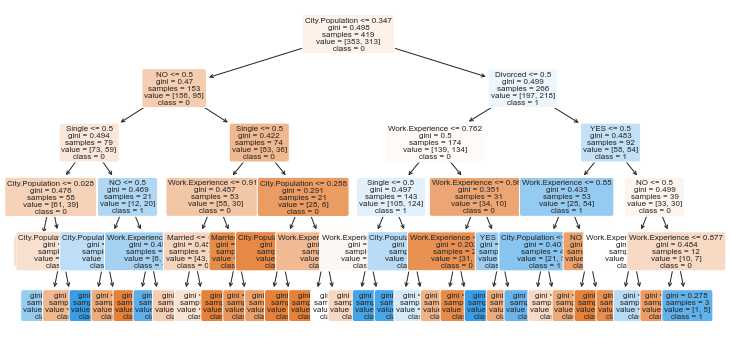

DecisionTreeClassifier(max_depth=5, max_features='sqrt', random_state=415968276)


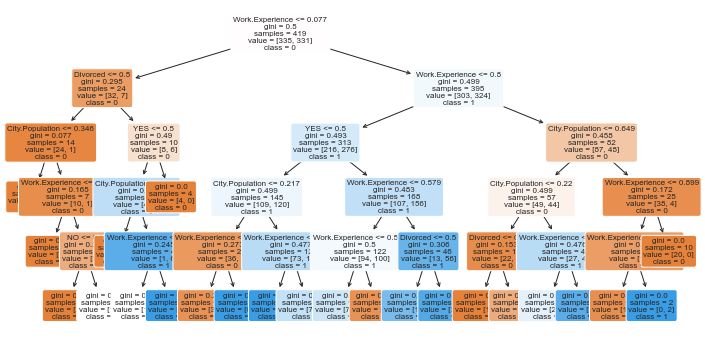

DecisionTreeClassifier(max_depth=5, max_features='sqrt', random_state=670094950)


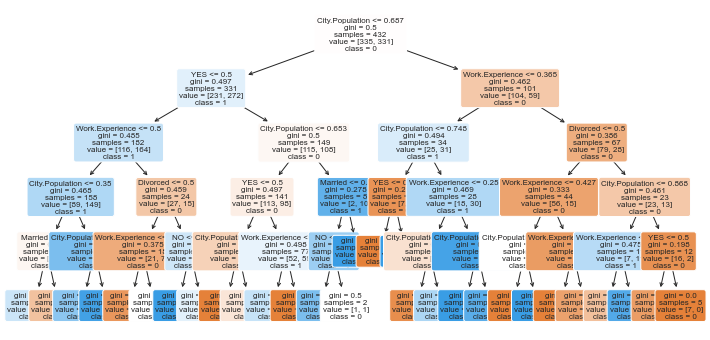

DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                       random_state=1914837113)


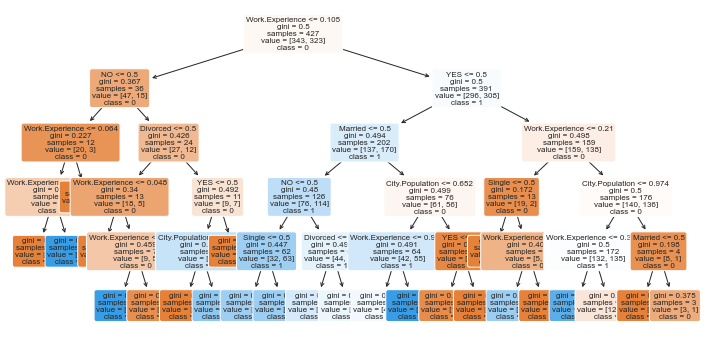

DecisionTreeClassifier(max_depth=5, max_features='sqrt', random_state=669991378)


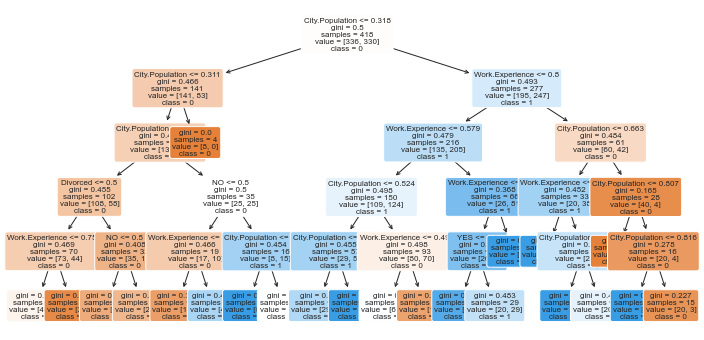

DecisionTreeClassifier(max_depth=5, max_features='sqrt', random_state=429389014)


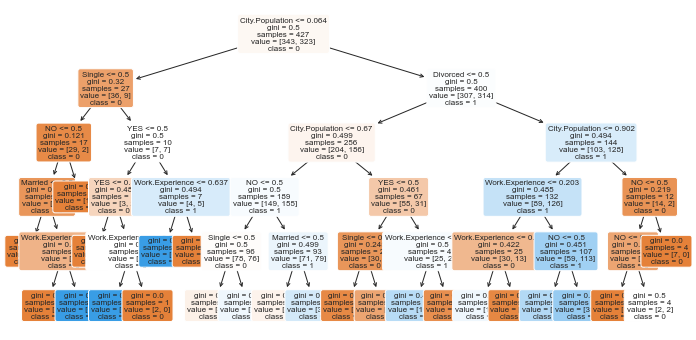

In [68]:
from sklearn import tree

features = x_data.columns.values # The name of each column
classes = ['0', '1', '2'] # The name of each class
# You can also use low, medium and high risks in the same order instead
# classes = ['low risk', 'medium risk', 'high risk']

for estimator in rfc.estimators_:
    print(estimator)
    plt.figure(figsize=(12,6))
    tree.plot_tree(estimator,
                   feature_names=features,
                   class_names=classes,
                   fontsize=8, 
                   filled=True, 
                   rounded=True)
    plt.show()

In [69]:
# Predict the test set labels
y_pred = rfc.predict(x_test)
pd.Series(y_pred).value_counts()

1.0    151
0.0    135
dtype: int64

              precision    recall  f1-score   support

         0.0       0.64      0.60      0.62       146
         1.0       0.61      0.66      0.63       140

    accuracy                           0.63       286
   macro avg       0.63      0.63      0.63       286
weighted avg       0.63      0.63      0.63       286



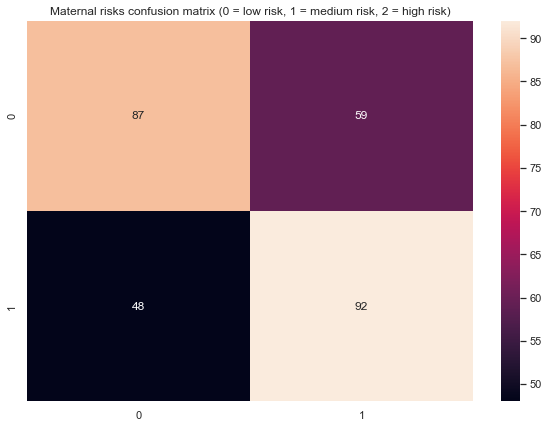

In [70]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d').set_title('Maternal risks confusion matrix (0 = low risk, 1 = medium risk, 2 = high risk)')

print(classification_report(y_test,y_pred))

In [71]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(rfc.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(rfc.score(x_test, y_test)))

Training set score: 0.7538
Test set score: 0.6259


In [72]:
df1 = pd.DataFrame({'actual': y_test, 'Entro_Prediction': y_pred})
df1.head()

actual  Entro_Prediction
0     1.0               1.0
1     0.0               0.0
2     1.0               0.0
3     1.0               0.0
4     0.0               0.0

<AxesSubplot:ylabel='Density'>

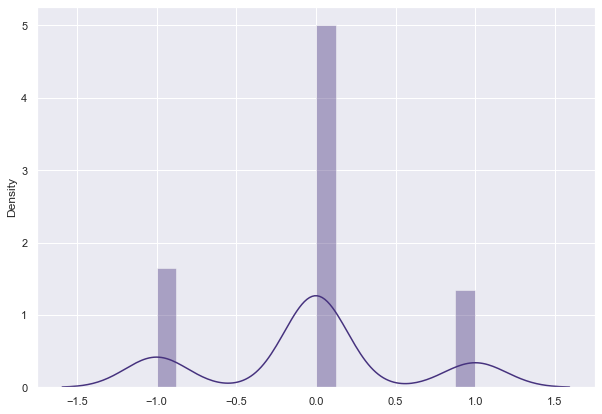

In [73]:
# checking difference between labled y and predicted y
plt.figure(figsize = (10,7))
sns.distplot(y_test-y_pred)

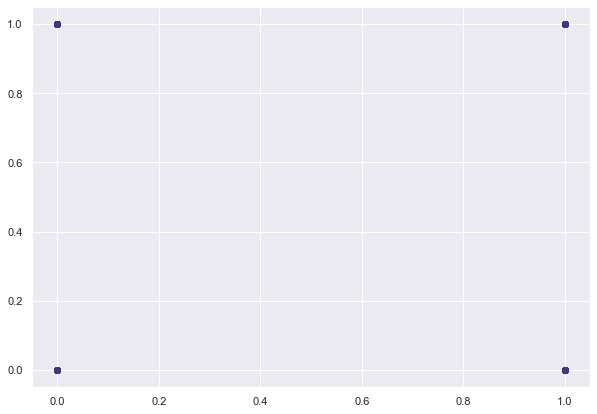

In [74]:
plt.figure(figsize = (10,7))
plt.scatter(y_test,y_pred)

In [75]:
# print the scores between dependent test and predicted value

print("Accuracy_score", accuracy_score(y_test,y_pred)*100)

Accuracy_score 62.58741258741259




 ROC AUC score: 0.6265166340508805 




Text(0, 0.5, 'True Positive Rate')

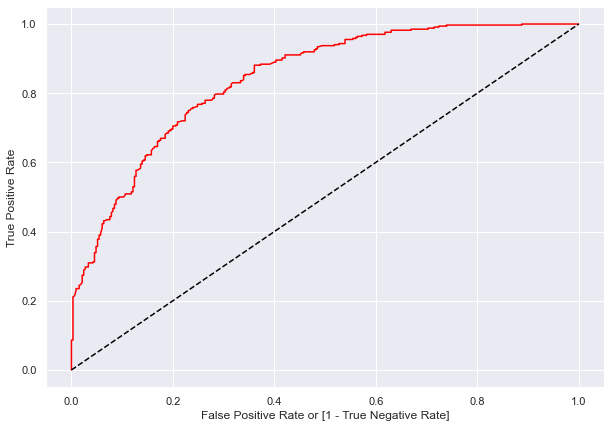

In [76]:
# plot ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_train, rfc.predict_proba (x_train)[:,1])

auc = roc_auc_score(y_test, y_pred)

plt.figure(figsize= (10,7))

plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')

print(f'\n\n ROC AUC score: {auc} \n\n')
plt.ylabel('True Positive Rate')

## Feature Importance:

<AxesSubplot:>

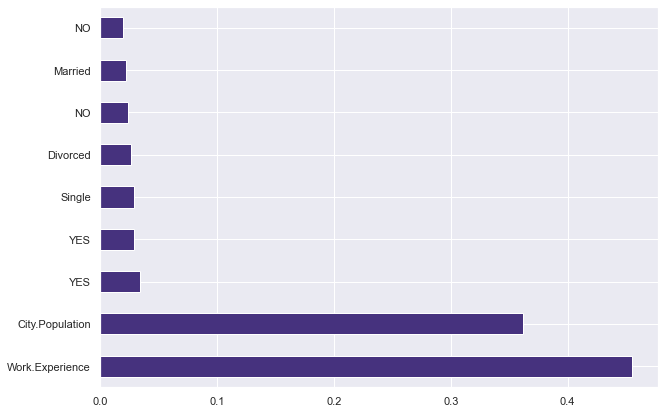

In [77]:
feat_importances = pd.Series(rfc.feature_importances_, index=x_data.columns)
plt.figure(figsize = (10,7))
feat_importances.nlargest(20).plot(kind='barh')